# Importing Libraries

In [1]:
!pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Dataset

In [12]:
df = pd.read_csv('laptops.csv',encoding='ISO-8859-1')
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


# Data Cleaning and EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


In [14]:
df.describe()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1133,1303,1303
unique,19,618,6,18,40,118,9,38,110,7,4,179,791
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.2kg,"1499,00"
freq,297,30,727,665,507,190,619,412,281,1125,1072,121,14


In [15]:
df.isnull().sum() # checking null values

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price (Euros)                 0
dtype: int64

In [16]:
df.duplicated().sum()

28

In [17]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [18]:
df.shape # checking dataset size

(1303, 13)

In [19]:
df['Price (Euros)'] = df['Price (Euros)'].str.replace(',', '.').astype(float)

In [20]:
# Conversion rate from Euro to Pound
conversion_rate = 0.85

# Calculating the price in pounds and creating a new column
df['Price (Pounds)'] = df['Price (Euros)'] * conversion_rate

# Displying the updated DataFrame with Euro and Pound prices
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros),Price (Pounds)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,1339.69,1138.7365
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,898.94,764.0990
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,575.00,488.7500
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,2537.45,2156.8325
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,1803.60,1533.0600


In [21]:
df.drop('Price (Euros)', axis=1, inplace=True) #dropping euros column

In [22]:
# cleaning weight and RAM column
df['RAM'] = df['RAM'].str.replace("GB","")
df['Weight'] = df['Weight'].str.replace("kg","")

In [23]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600


In [24]:
df['Weight'] = df['Weight'].replace('4s', '4.00')

In [25]:
df['RAM'] = df['RAM'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1303 non-null   object 
 1   Model Name                1303 non-null   object 
 2   Category                  1303 non-null   object 
 3   Screen Size               1303 non-null   object 
 4   Screen                    1303 non-null   object 
 5   CPU                       1303 non-null   object 
 6   RAM                       1303 non-null   int32  
 7    Storage                  1303 non-null   object 
 8   GPU                       1303 non-null   object 
 9   Operating System          1303 non-null   object 
 10  Operating System Version  1133 non-null   object 
 11  Weight                    1303 non-null   float32
 12  Price (Pounds)            1303 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(10)
memory usage: 1

In [27]:
# Renaming ' storage' to 'storage'
df = df.rename(columns={' Storage': 'Storage'})

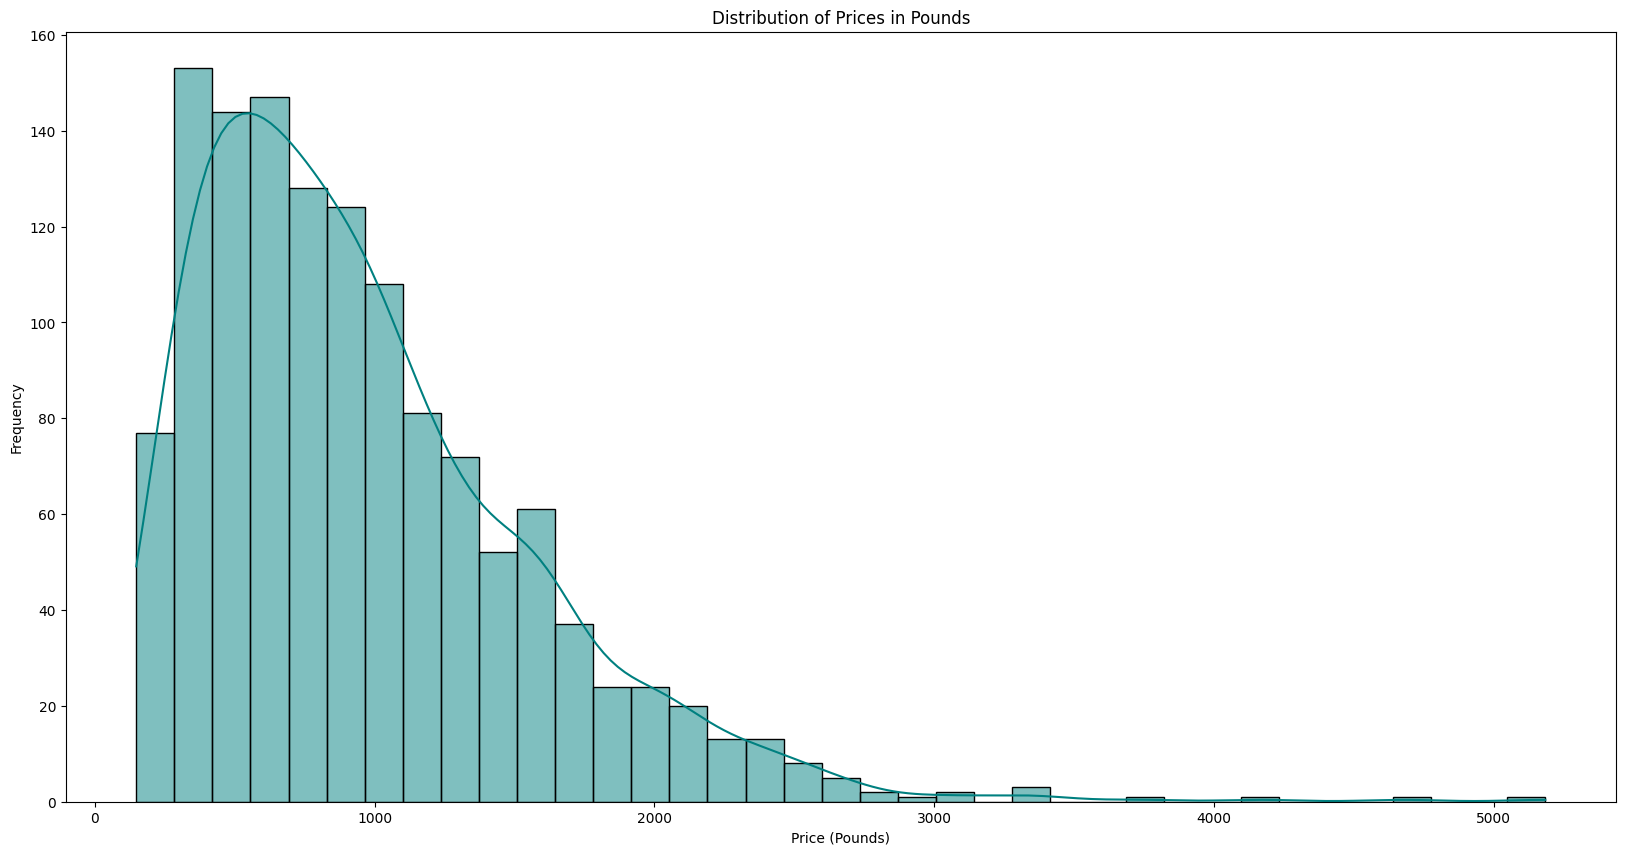

In [28]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot(df['Price (Pounds)'], kde=True, color='teal')
plt.title('Distribution of Prices in Pounds')
plt.xlabel('Price (Pounds)')
plt.ylabel('Frequency')
plt.show()

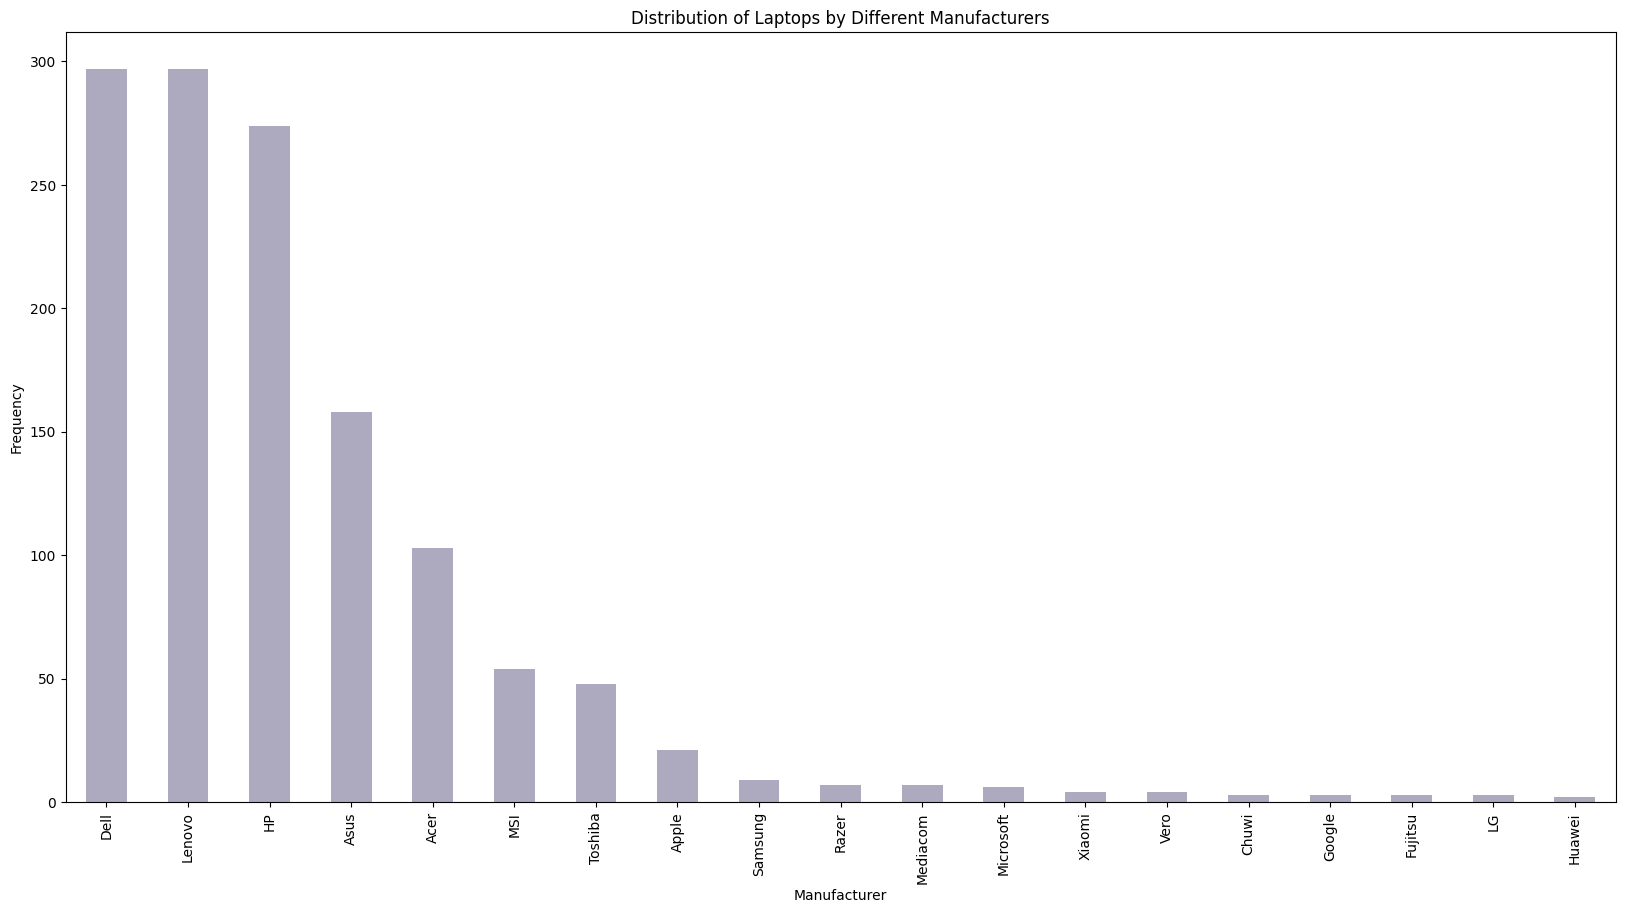

In [29]:
plt.figure(figsize=(20,10))
df['Manufacturer'].value_counts().plot(kind='bar',color = '#ADAABF')
plt.title('Distribution of Laptops by Different Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.show()

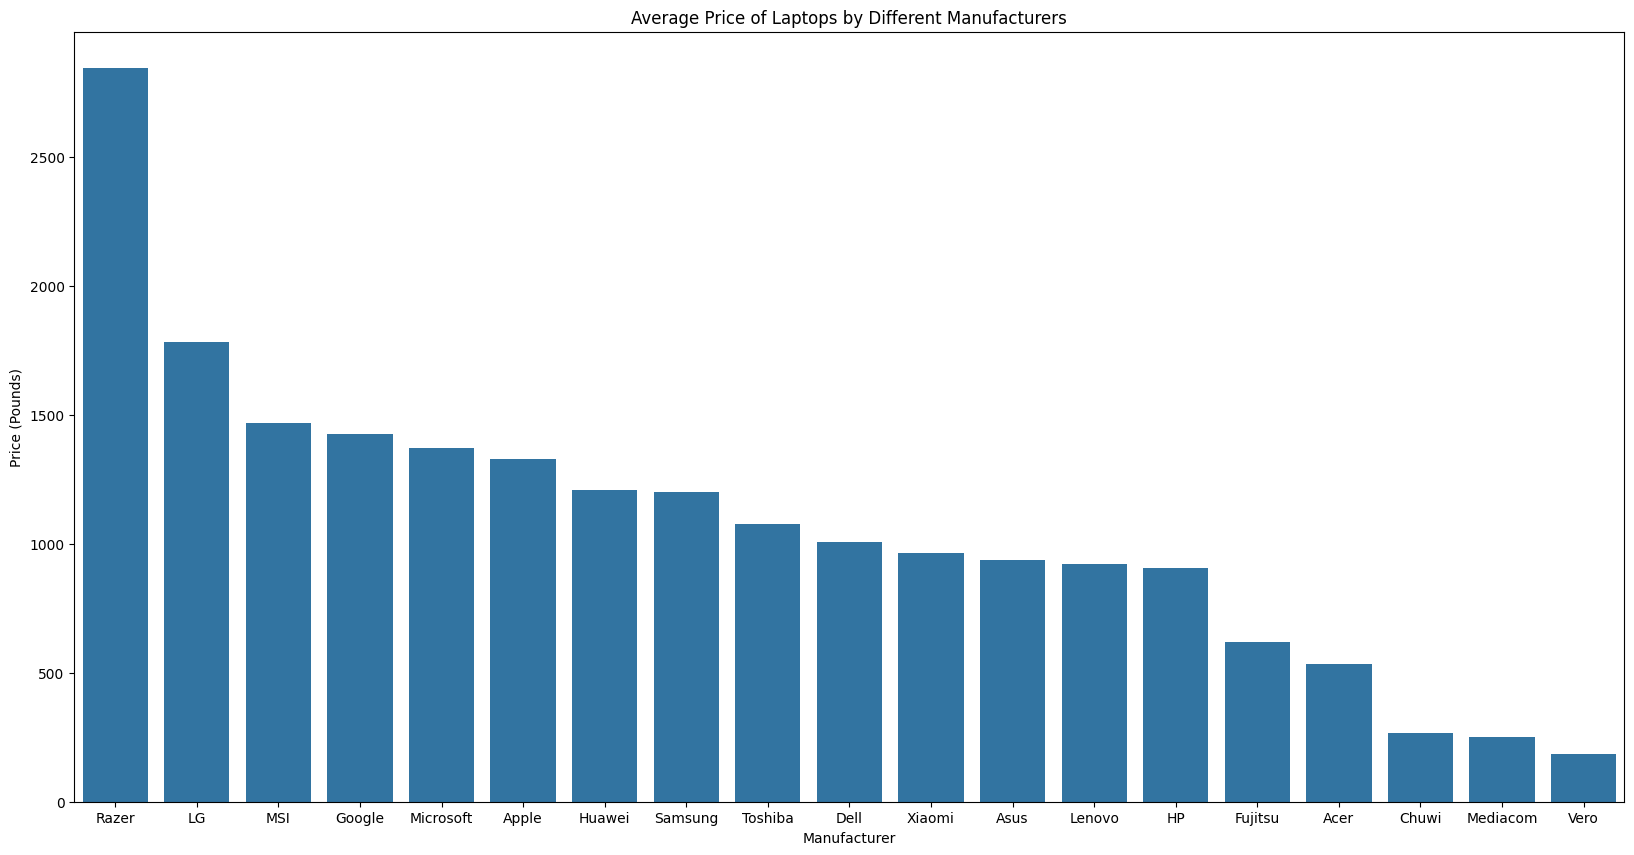

In [30]:
sorted_data = df.groupby('Manufacturer')['Price (Pounds)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x= 'Manufacturer', y = 'Price (Pounds)', data=sorted_data)
plt.title('Average Price of Laptops by Different Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price (Pounds)')
plt.show()

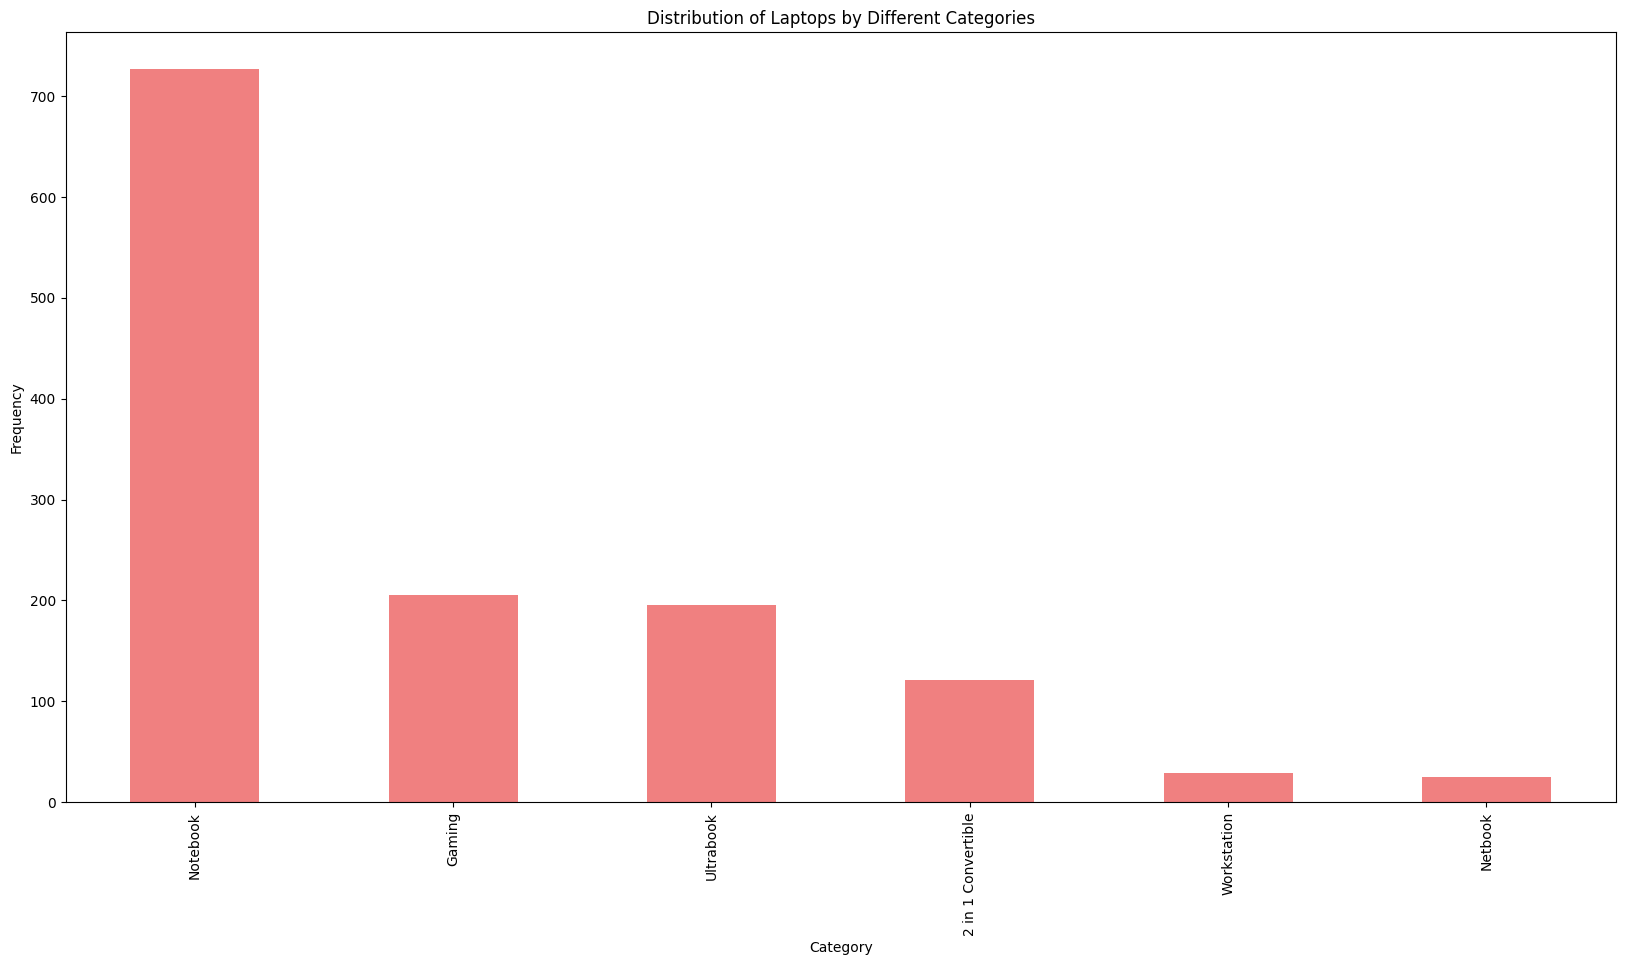

In [31]:
plt.figure(figsize=(20,10))
df['Category'].value_counts().plot(kind='bar',color='lightcoral')
plt.title('Distribution of Laptops by Different Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

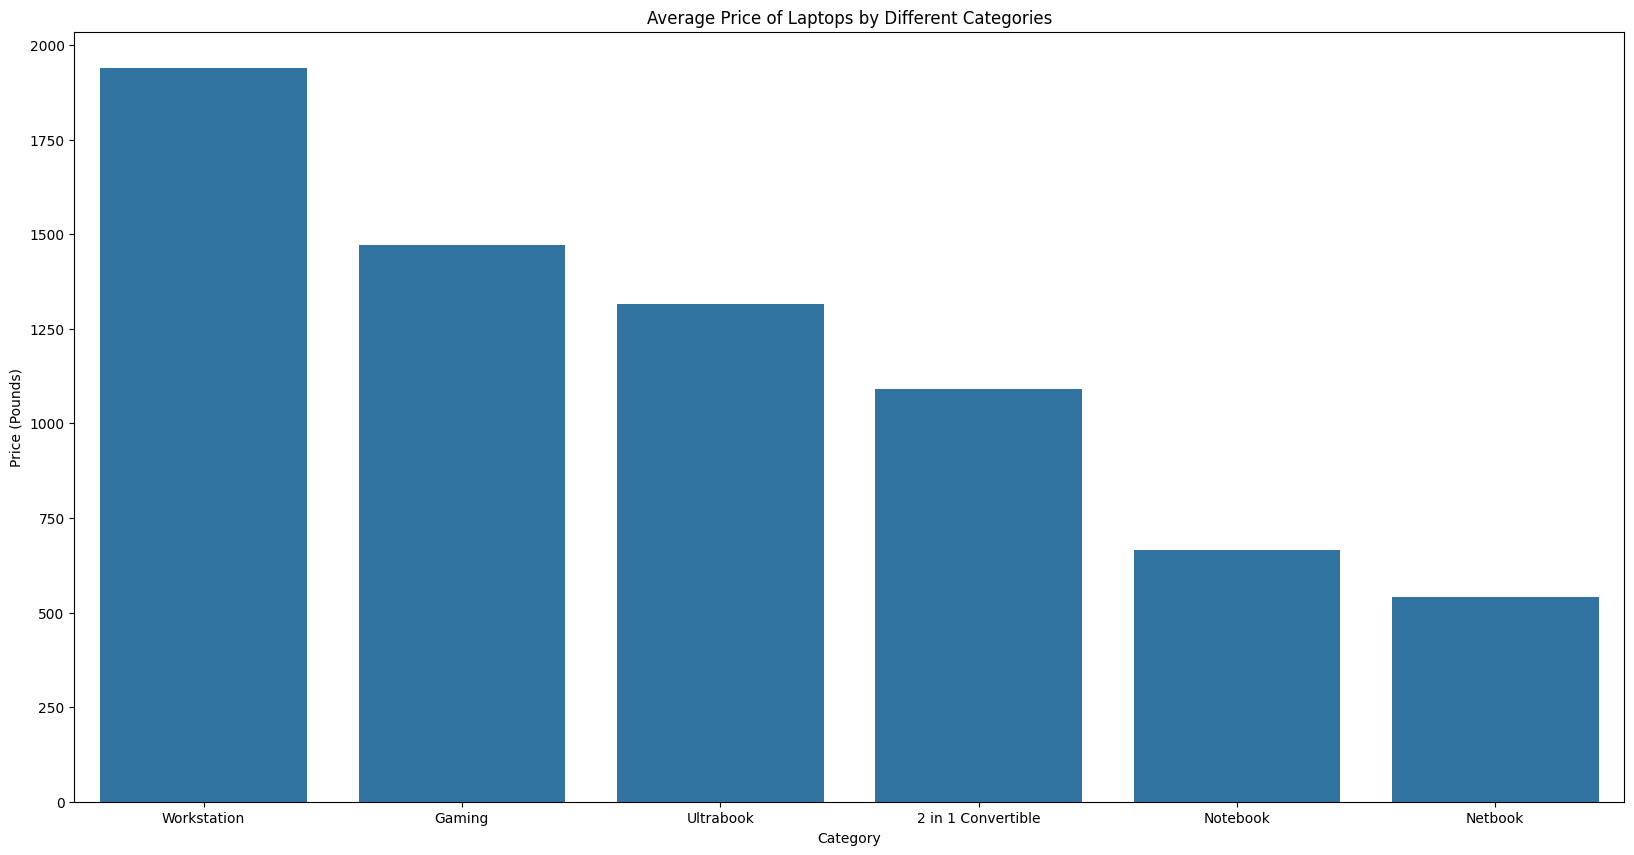

In [32]:
sorted_data = df.groupby('Category')['Price (Pounds)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x= 'Category', y = 'Price (Pounds)', data=sorted_data)
plt.title('Average Price of Laptops by Different Categories')
plt.xlabel('Category')
plt.ylabel('Price (Pounds)')
plt.show()

In [33]:
df['Inches'] = df['Screen Size'].str.replace('"', '') # creating new variable inches from screen size and converting it to float

In [34]:
df['Inches'] = df['Inches'].astype('float32')

In [35]:
df.drop('Screen Size', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1303 non-null   object 
 1   Model Name                1303 non-null   object 
 2   Category                  1303 non-null   object 
 3   Screen                    1303 non-null   object 
 4   CPU                       1303 non-null   object 
 5   RAM                       1303 non-null   int32  
 6   Storage                   1303 non-null   object 
 7   GPU                       1303 non-null   object 
 8   Operating System          1303 non-null   object 
 9   Operating System Version  1133 non-null   object 
 10  Weight                    1303 non-null   float32
 11  Price (Pounds)            1303 non-null   float64
 12  Inches                    1303 non-null   float32
dtypes: float32(2), float64(1), int32(1), object(9)
memory usage: 11

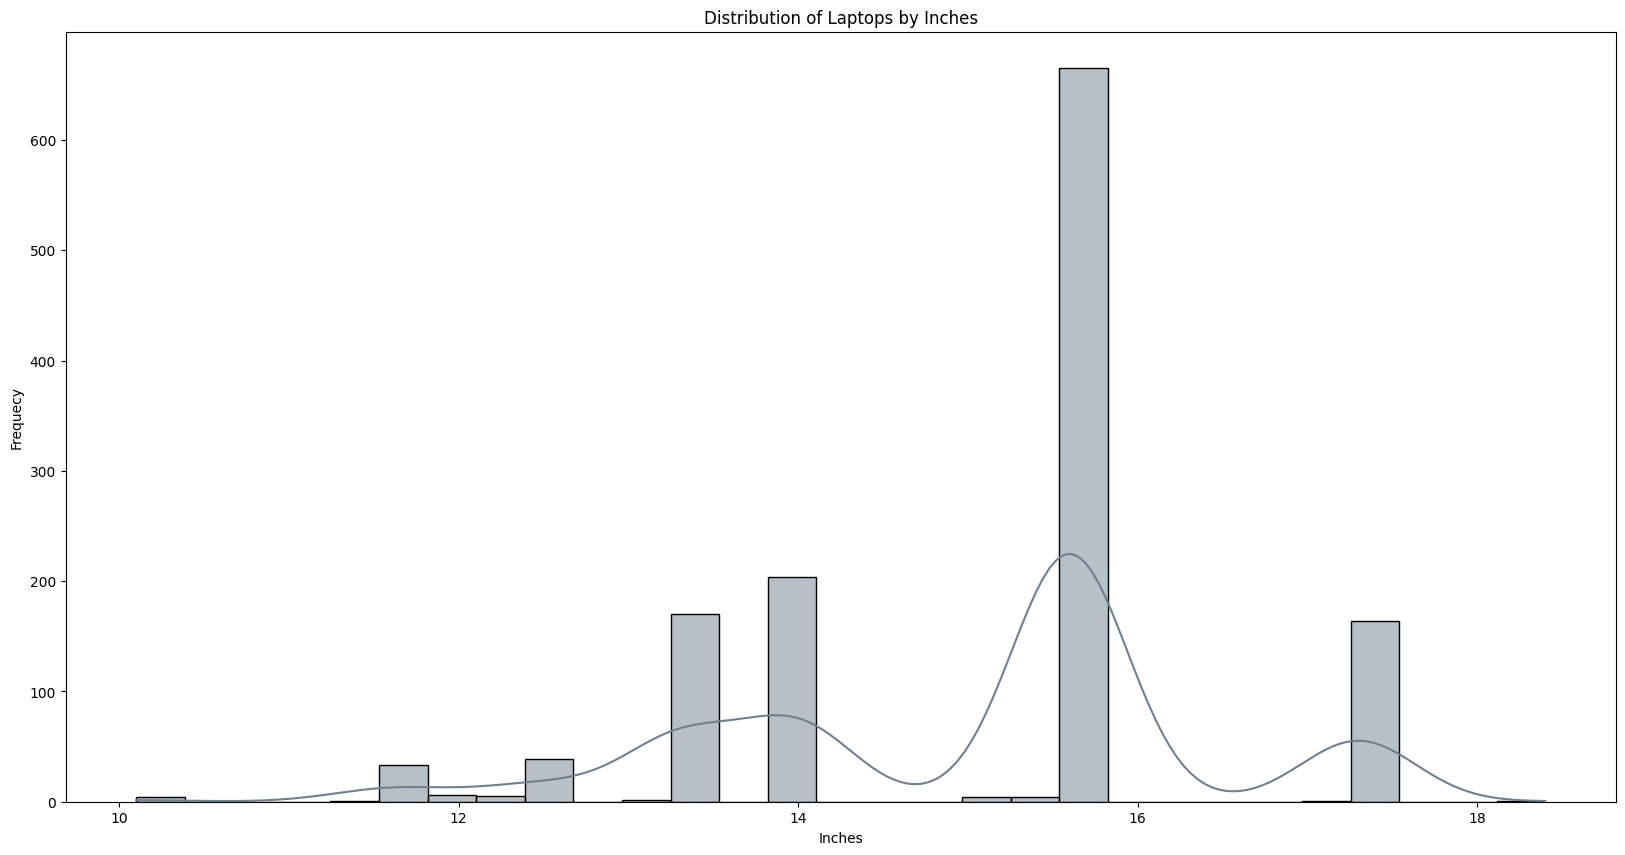

In [36]:
plt.figure(figsize=(20,10))
sns.histplot(df['Inches'],kde=True,color='slategrey')
plt.title('Distribution of Laptops by Inches')
plt.xlabel('Inches')
plt.ylabel('Frequecy')
plt.show()

###  Insight: 15.6 inches laptops dominate the dataset.

In [37]:
df['Screen'].value_counts().head()

Screen
Full HD 1920x1080                            507
1366x768                                     281
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     53
Full HD / Touchscreen 1920x1080               47
Name: count, dtype: int64

In [38]:
df['Touchscreen'] = df['Screen'].apply(lambda x:1 if 'Touchscreen' in x else 0)

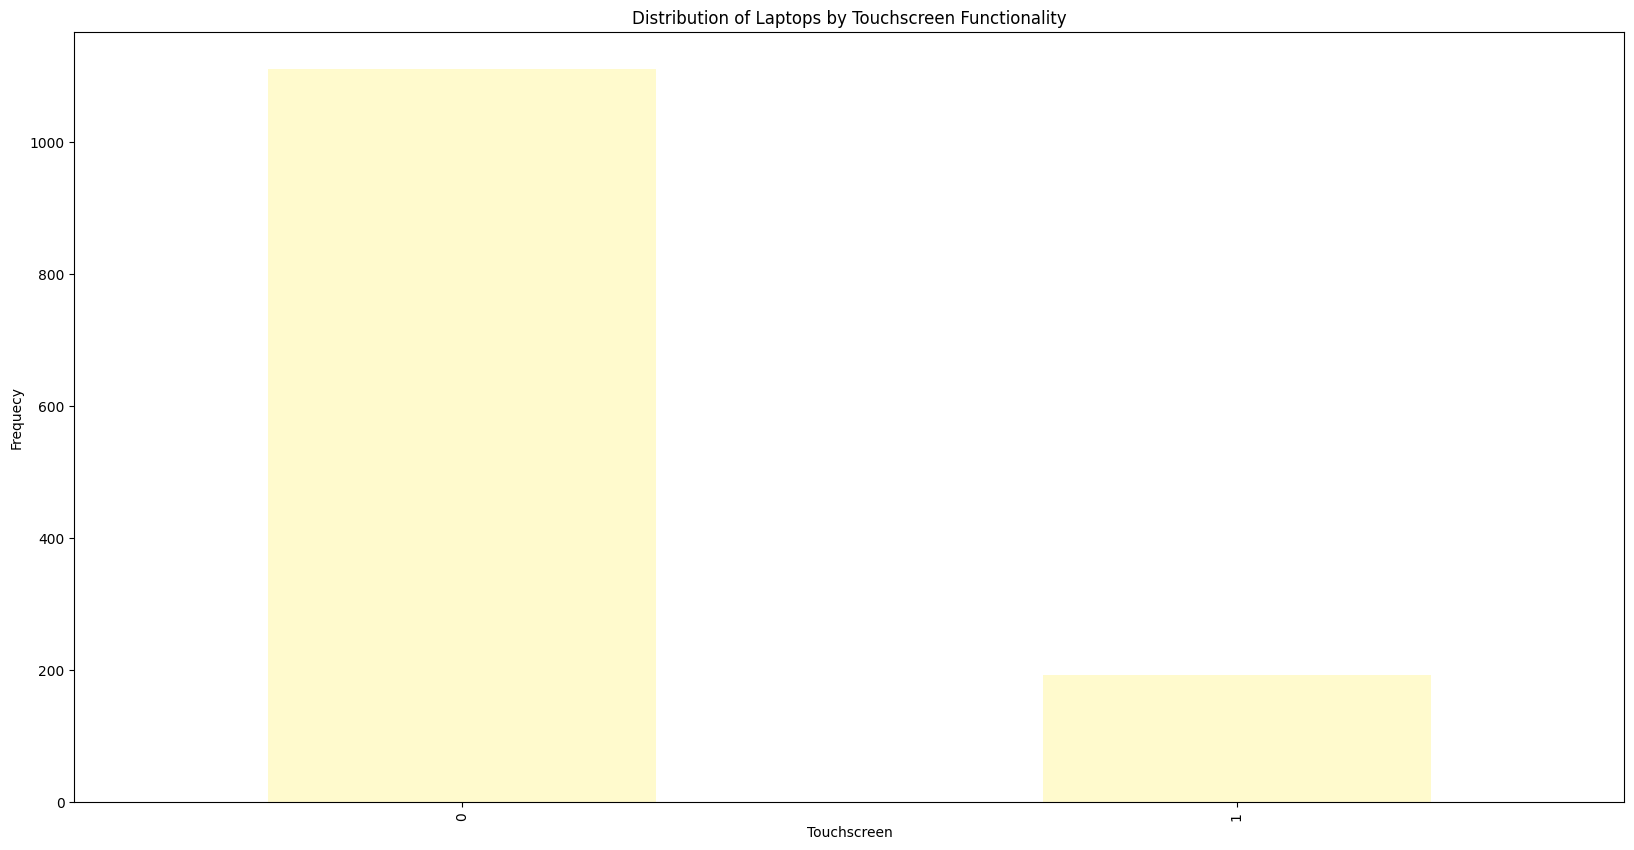

In [39]:
plt.figure(figsize=(20,10))
df['Touchscreen'].value_counts().plot(kind='bar',color='lemonchiffon')
plt.title('Distribution of Laptops by Touchscreen Functionality')
plt.xlabel('Touchscreen')
plt.ylabel('Frequecy')
plt.show()

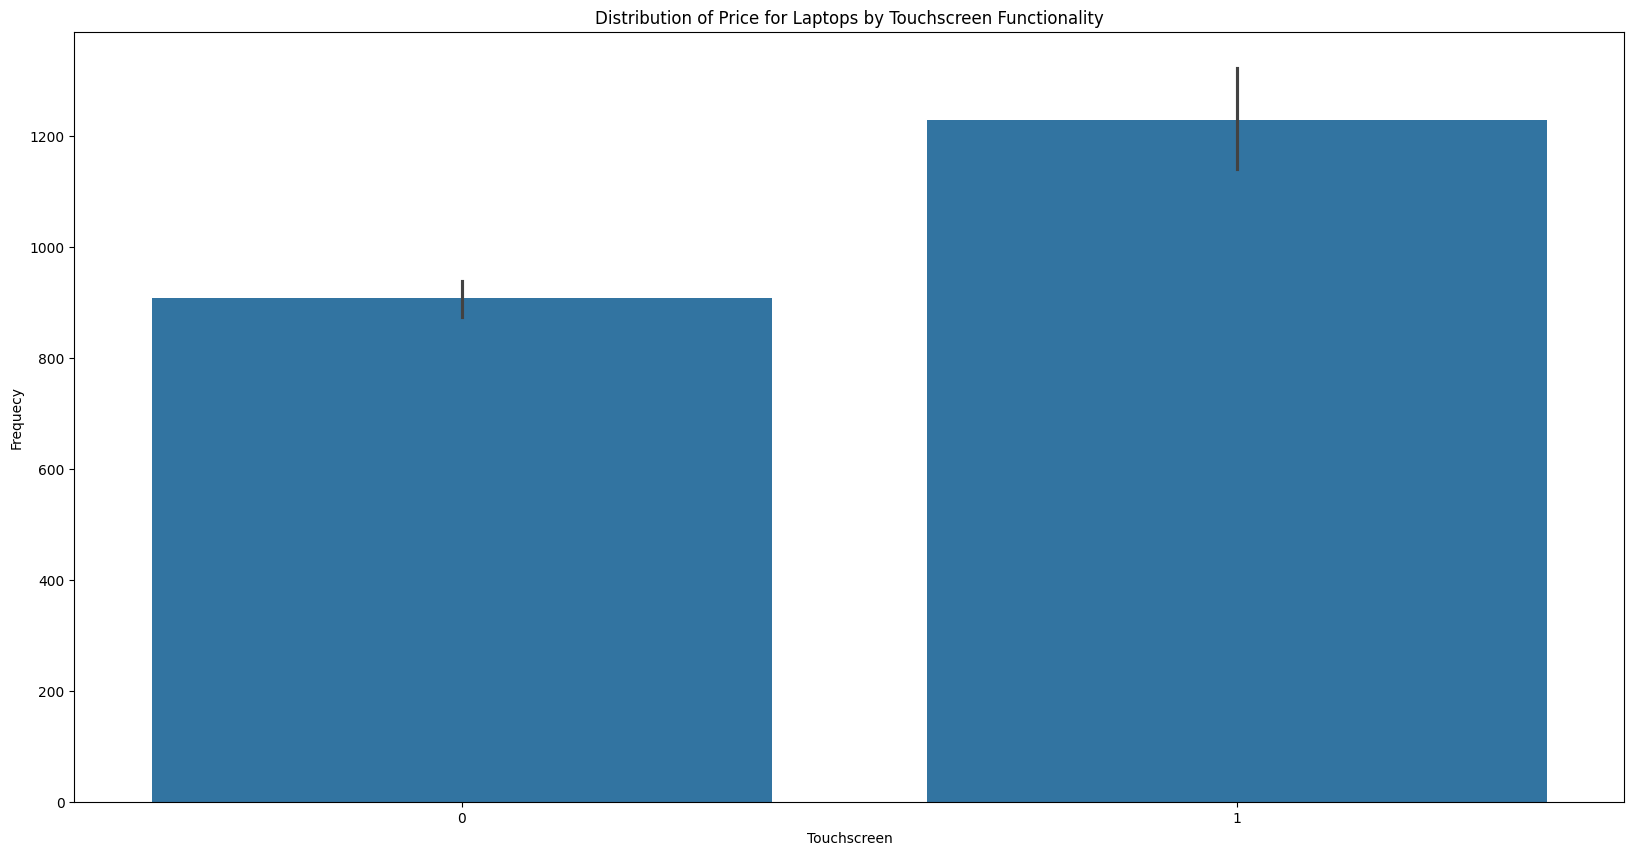

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Touchscreen'],y=df['Price (Pounds)'])
plt.title('Distribution of Price for Laptops by Touchscreen Functionality')
plt.xlabel('Touchscreen')
plt.ylabel('Frequecy')
plt.show()

In [41]:
df['IPS'] = df['Screen'].apply(lambda x:1 if 'IPS' in x else 0)

<ipython-input-42-6efe75dd2f16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['IPS'],y=df['Price (Pounds)'], palette=custom_palette)
<ipython-input-42-6efe75dd2f16>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=df['IPS'],y=df['Price (Pounds)'], palette=custom_palette)


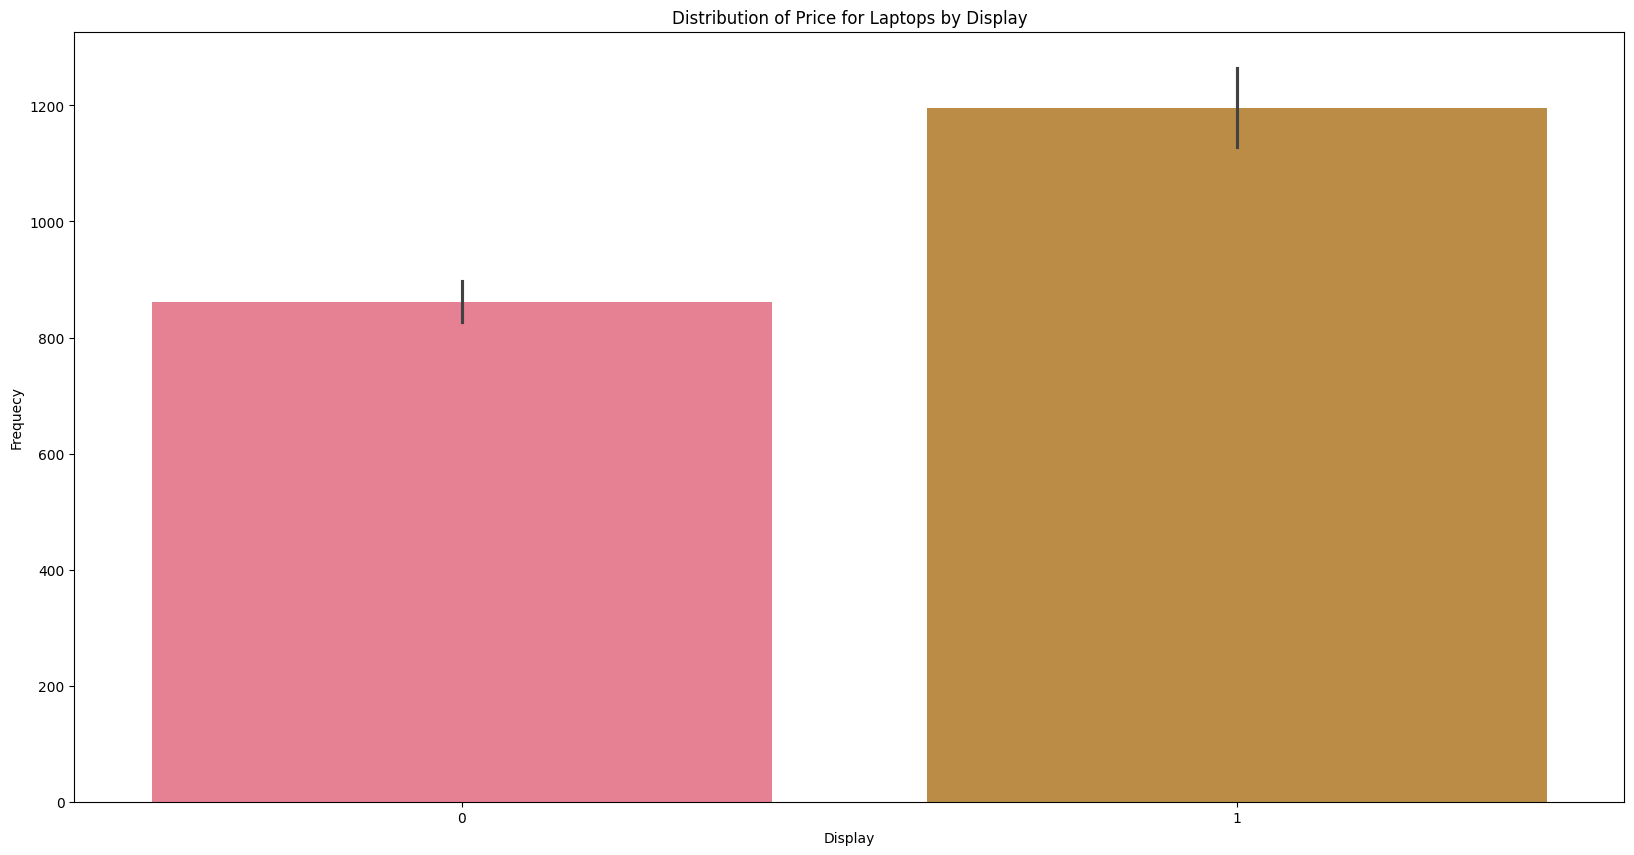

In [42]:
# Creating a custom palette
custom_palette = sns.color_palette("husl", 8)  # HUSL color space palette
plt.figure(figsize=(20,10))
sns.barplot(x=df['IPS'],y=df['Price (Pounds)'], palette=custom_palette)
plt.title('Distribution of Price for Laptops by Display')
plt.xlabel('Display')
plt.ylabel('Frequecy')
plt.show()

In [43]:
dim = df['Screen'].str.split('x',n=1,expand=True)

In [44]:
df['x_res'] = dim[0]
df['y_res'] = dim[1]

In [45]:
df.head()

,Manufacturer,Model Name,Category,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Inches,Touchscreen,IPS,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,13.3,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,15.6,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,15.4,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,13.3,0,1,IPS Panel Retina Display 2560,1600


In [46]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [47]:
df.head()

,Manufacturer,Model Name,Category,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Inches,Touchscreen,IPS,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,13.3,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,15.6,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,15.4,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,13.3,0,1,2560,1600


In [48]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1303 non-null   object 
 1   Model Name                1303 non-null   object 
 2   Category                  1303 non-null   object 
 3   Screen                    1303 non-null   object 
 4   CPU                       1303 non-null   object 
 5   RAM                       1303 non-null   int32  
 6   Storage                   1303 non-null   object 
 7   GPU                       1303 non-null   object 
 8   Operating System          1303 non-null   object 
 9   Operating System Version  1133 non-null   object 
 10  Weight                    1303 non-null   float32
 11  Price (Pounds)            1303 non-null   float64
 12  Inches                    1303 non-null   float32
 13  Touchscreen               1303 non-null   int64  
 14  IPS     

In [50]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# If you want to see this correlation matrix
corr_matrix['Price (Pounds)']

RAM               0.743007
Weight            0.210370
Price (Pounds)    1.000000
Inches            0.068197
Touchscreen       0.191226
IPS               0.252208
x_res             0.556529
y_res             0.552809
Name: Price (Pounds), dtype: float64

In [51]:
df['PPI'] = (((df['x_res']**2 + df['y_res']**2))**0.5/df['Inches']).astype('float')

In [52]:
df.head()

,Manufacturer,Model Name,Category,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Inches,Touchscreen,IPS,x_res,y_res,PPI
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,13.3,0,1,2560,1600,226.983001
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,13.3,0,0,1440,900,127.677938
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,15.6,0,0,1920,1080,141.211995
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,15.4,0,1,2880,1800,220.534629
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,13.3,0,1,2560,1600,226.983001


In [53]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# If you want to see this correlation matrix
corr_matrix['Price (Pounds)']

RAM               0.743007
Weight            0.210370
Price (Pounds)    1.000000
Inches            0.068197
Touchscreen       0.191226
IPS               0.252208
x_res             0.556529
y_res             0.552809
PPI               0.473487
Name: Price (Pounds), dtype: float64

In [54]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [55]:
df.head()

,Manufacturer,Model Name,Category,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,0,1,226.983001
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,0,0,127.677938
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,0,0,141.211995
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,0,1,220.534629
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,0,1,226.983001


In [56]:
df['CPU'].value_counts()

CPU
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [57]:
df['CPUbrand'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [58]:
df.head()

,Manufacturer,Model Name,Category,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,0,1,226.983001,Intel Core i5
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,0,0,127.677938,Intel Core i5
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,0,0,141.211995,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,0,1,220.534629,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,0,1,226.983001,Intel Core i5


In [59]:
df['CPUbrand'].value_counts()

CPUbrand
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [60]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [61]:
df['CPUbrand'] = df['CPUbrand'].apply(fetch_processor)

In [62]:
df.sample(10)

,Manufacturer,Model Name,Category,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand
611,Dell,Inspiron 7559,Gaming,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows,10,2.590,747.1585,0,0,141.211995,Intel Core i7
570,HP,ZBook 17,Workstation,1600x900,Intel Core i5 7440HQ 2.8GHz,8,500GB HDD,Nvidia Quadro M1200,Windows,10,3.140,1581.8415,0,0,106.113067,Intel Core i5
262,HP,ProBook 450,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel HD Graphics 620,Windows,10,2.100,613.7000,0,1,141.211995,Intel Core i5
956,Dell,XPS 13,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows,10,1.240,1614.1500,1,0,165.632116,Intel Core i5
1103,HP,ZBook 17,Workstation,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,AMD FirePro W6150M,Windows,7,3.000,2464.1500,0,1,127.335680,Intel Core i7
1211,Asus,FX502VM-AS73 (i7-7700HQ/16GB/1TB,Notebook,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.200,1486.6500,0,0,141.211995,Intel Core i7
115,HP,Spectre x360,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,10,1.260,1189.1415,1,1,165.632116,Intel Core i5
512,Dell,Vostro 5568,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows,10,2.180,710.6000,0,0,141.211995,Intel Core i5
589,Asus,ROG Strix,Gaming,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.730,1504.5000,0,1,127.335680,Intel Core i5
670,Microsoft,Surface Laptop,Ultrabook,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows,10 S,1.252,1587.6725,1,0,200.842560,Intel Core i7


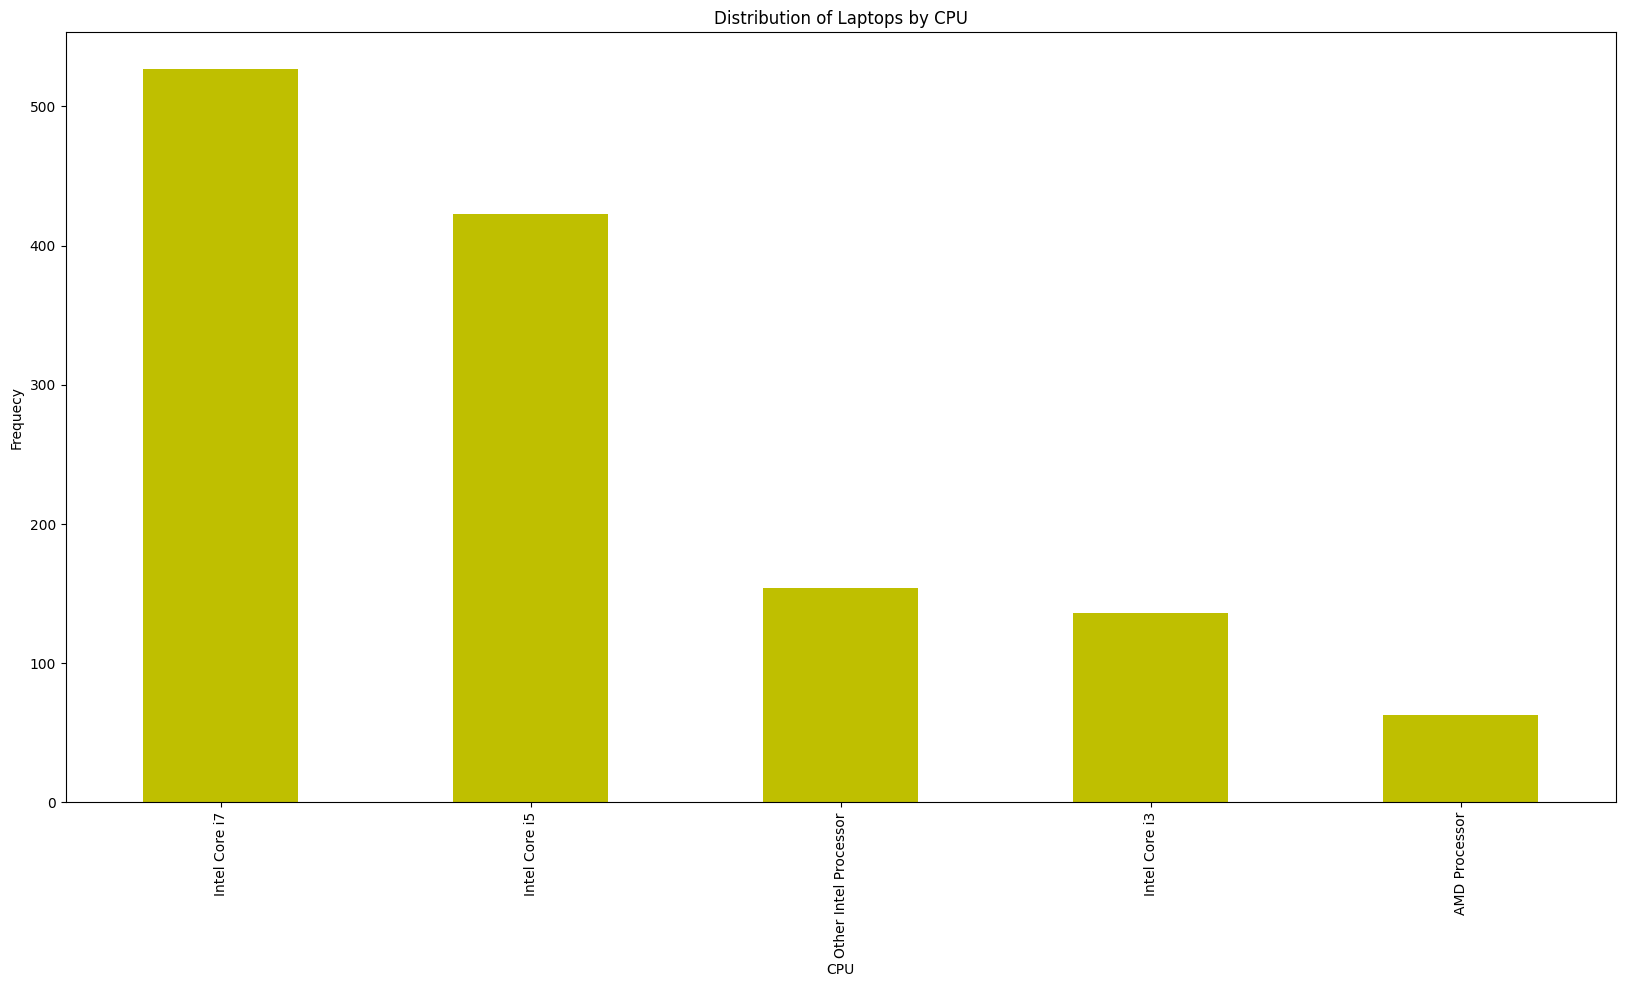

In [63]:
plt.figure(figsize=(20,10))
df['CPUbrand'].value_counts().plot(kind='bar',color='y')
plt.title('Distribution of Laptops by CPU')
plt.xlabel('CPU')
plt.ylabel('Frequecy')
plt.show()

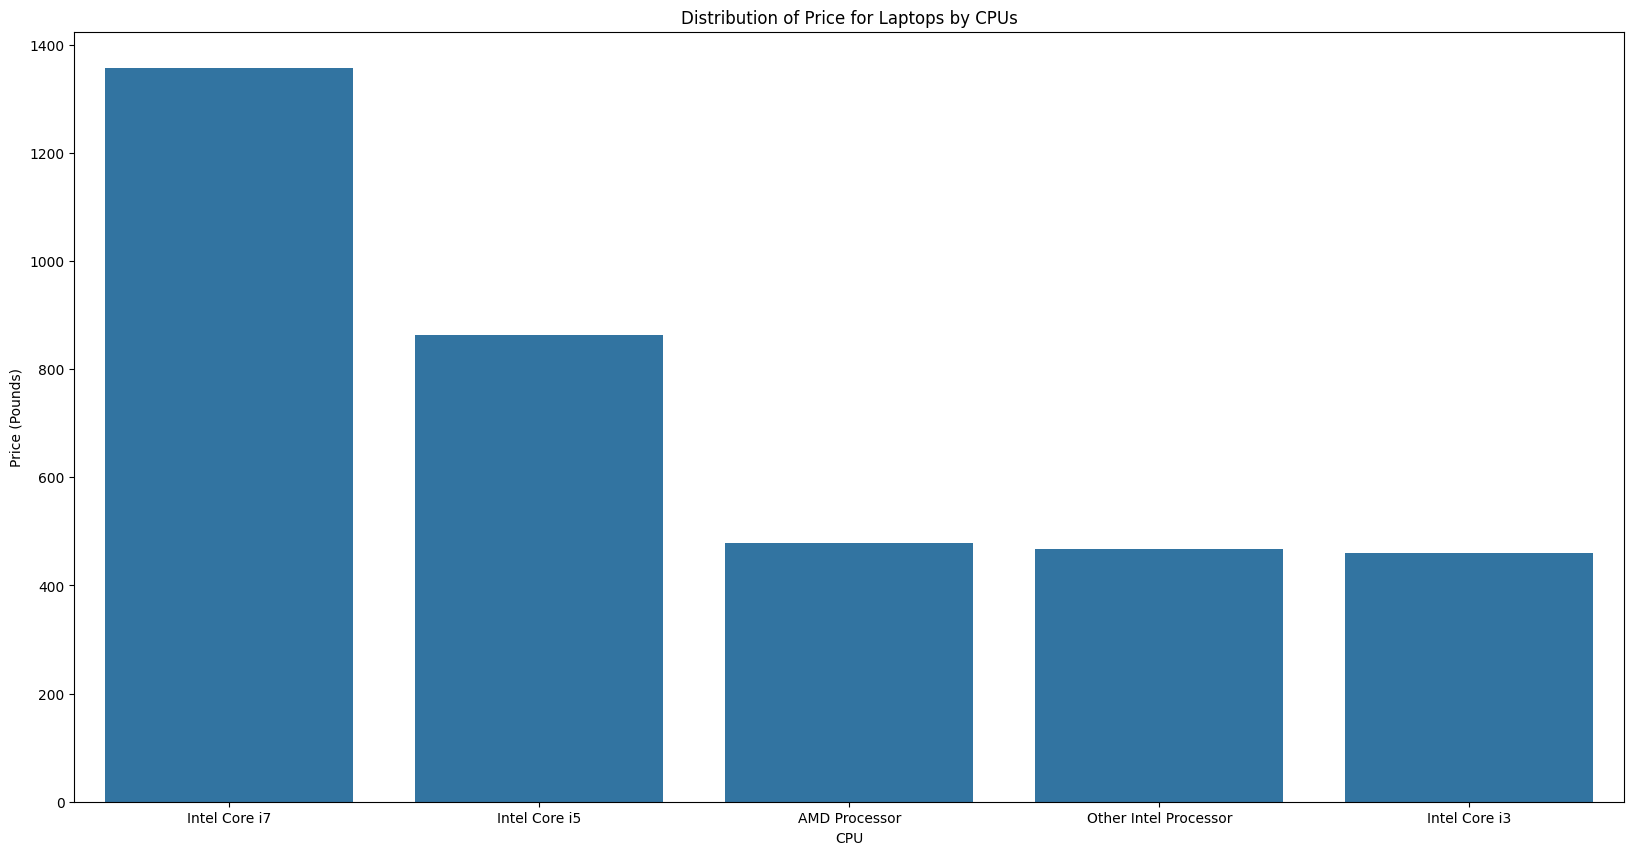

In [64]:
sorted_data = df.groupby('CPUbrand')['Price (Pounds)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x= 'CPUbrand', y = 'Price (Pounds)', data=sorted_data)
plt.title('Distribution of Price for Laptops by CPUs')
plt.xlabel('CPU')
plt.ylabel('Price (Pounds)')
plt.show()

In [65]:
df.drop(columns=['CPU'],inplace=True)

In [66]:
df.head()

,Manufacturer,Model Name,Category,Screen,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,0,1,226.983001,Intel Core i5
1,Apple,Macbook Air,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,0,0,127.677938,Intel Core i5
2,HP,250 G6,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,0,0,141.211995,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,0,1,220.534629,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,0,1,226.983001,Intel Core i5


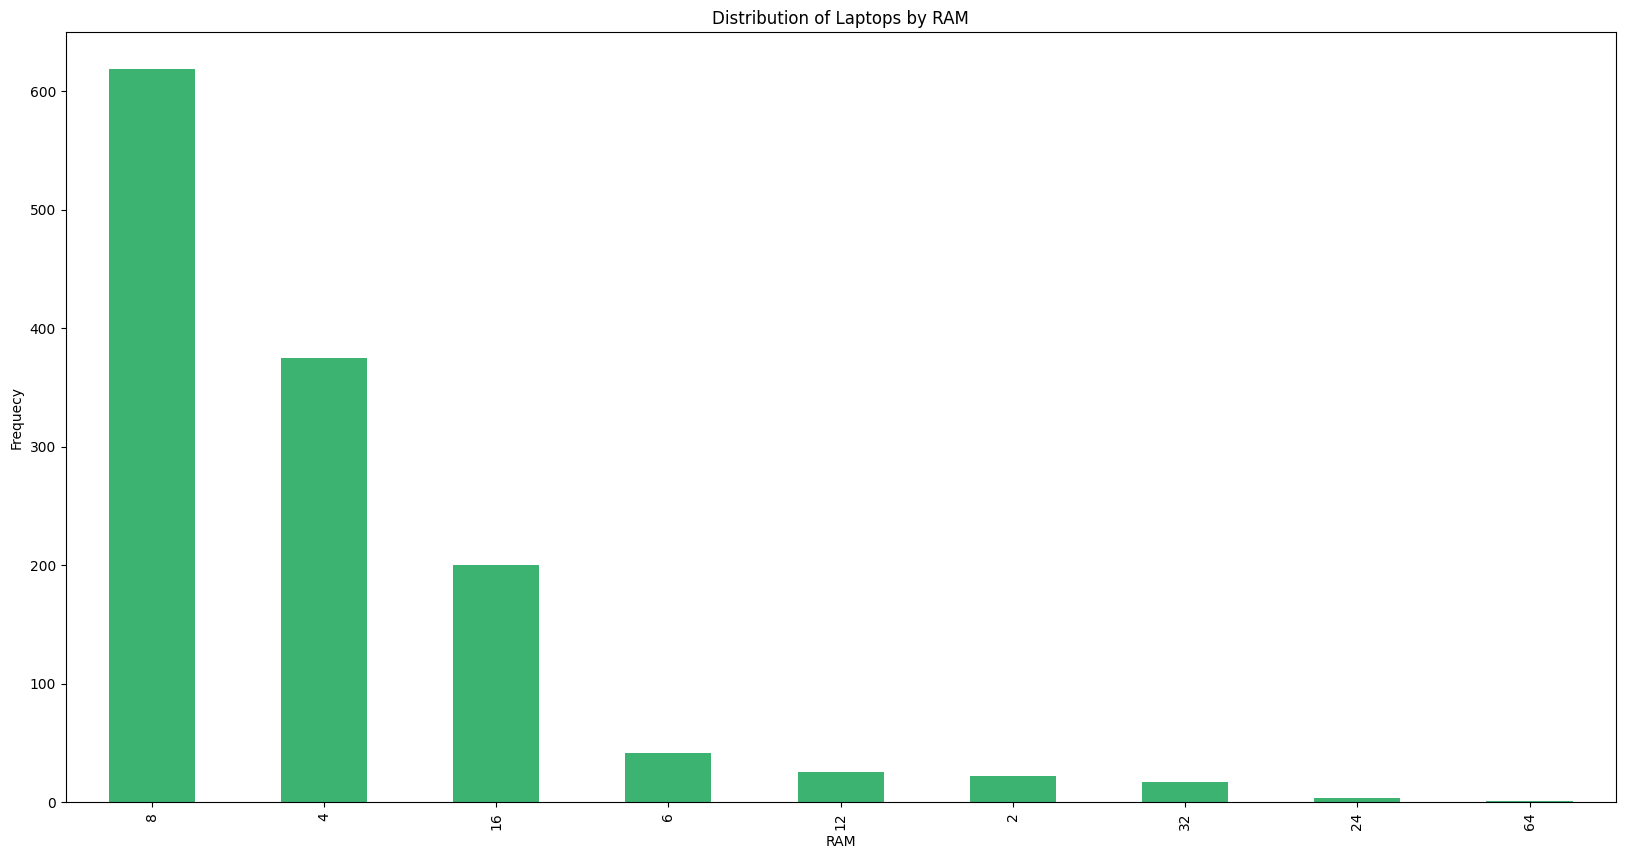

In [67]:
plt.figure(figsize=(20,10))
df['RAM'].value_counts().plot(kind='bar',color='mediumseagreen')
plt.title('Distribution of Laptops by RAM')
plt.xlabel('RAM')
plt.ylabel('Frequecy')
plt.show()

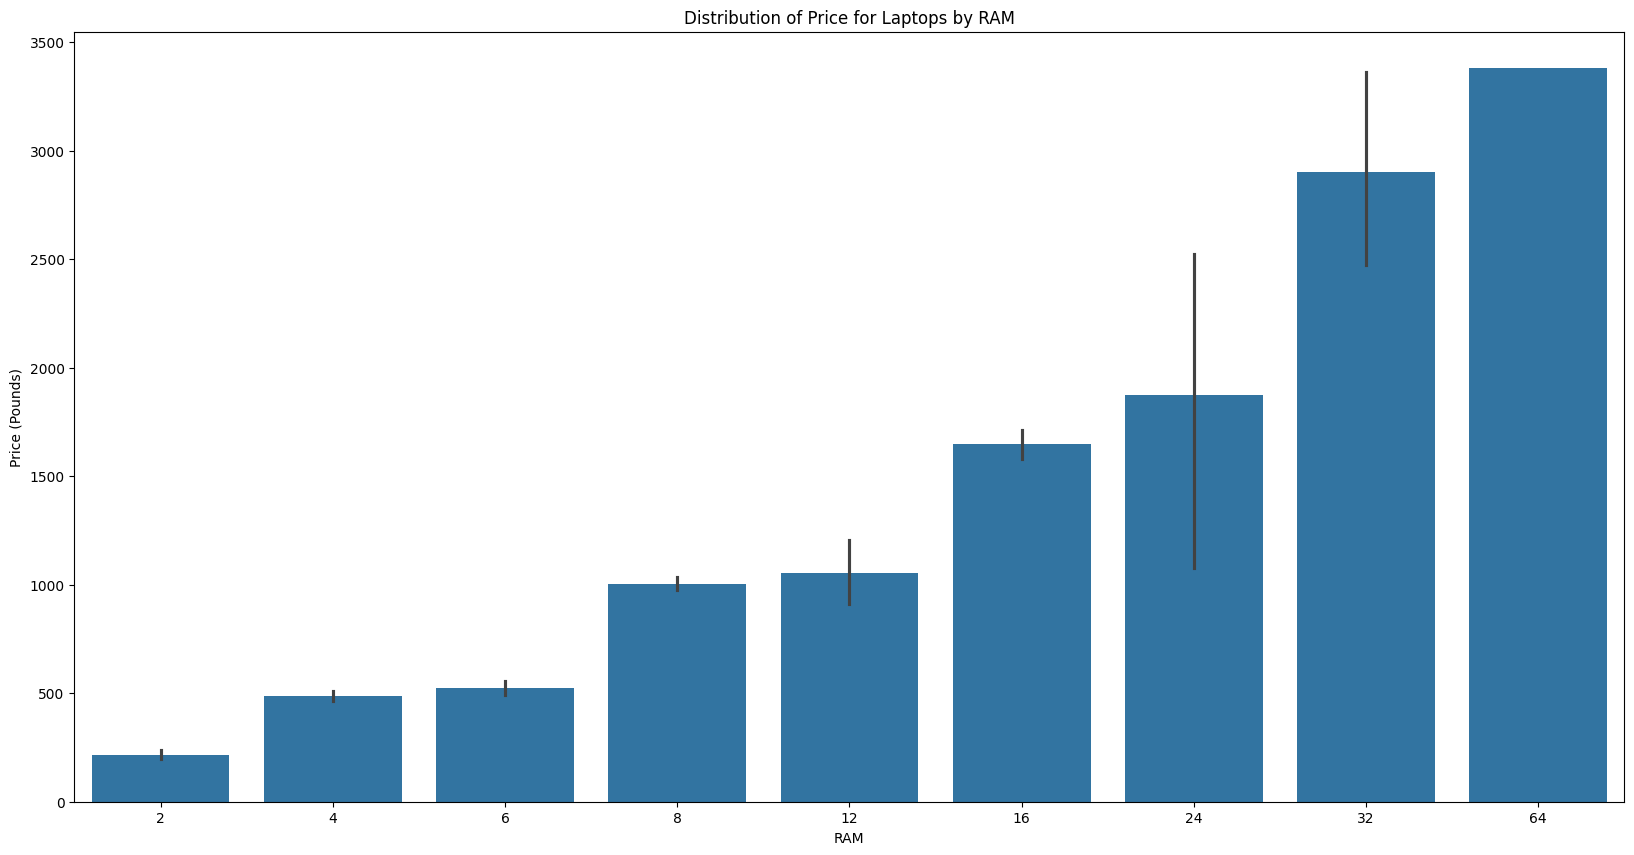

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(x= df['RAM'], y = df['Price (Pounds)'])
plt.title('Distribution of Price for Laptops by RAM')
plt.xlabel('RAM')
plt.ylabel('Price (Pounds)')
plt.show()

In [69]:
df['Storage'].value_counts()

Storage
256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD        

In [70]:
# df['Storage'] = df['Storage'].astype(str).replace('\.0', '', regex=True)
# df["Storage"] = df["Storage"].str.replace('GB', '')
# df["Storage"] = df["Storage"].str.replace('TB', '000')
# new = df["Storage"].str.split("+", n = 1, expand = True)

# df["first"]= new[0]
# df["first"]=df["first"].str.strip()

# df["second"]= new[1]

# df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# df['first'] = df['first'].str.replace(r'\D', '')

# df["second"].fillna("0", inplace = True)

# df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# df['second'] = df['second'].str.replace(r'\D', '')

# df["first"] = df["first"].astype(int)
# df["second"] = df["second"].astype(int)

# df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
# df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
# df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
# df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
#        'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
#        'Layer2Flash_Storage'],inplace=True)

In [71]:
import pandas as pd

# Sample DataFrame creation if needed for testing
# df = pd.DataFrame({'Storage': ['256GB SSD', '1TB HDD', '128GB SSD + 1TB HDD', '512GB Flash Storage', '256GB SSD + 1TB Hybrid']})

# Preprocessing
df['Storage'] = df['Storage'].astype(str).replace('\.0', '', regex=True)
df['Storage'] = df['Storage'].str.replace('GB', '').str.replace('TB', '000')

# Splitting and cleaning
new = df['Storage'].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("")

# Initialize Layer2 columns to handle cases with no valid data
for col in ["Layer2HDD", "Layer2SSD", "Layer2Hybrid", "Layer2Flash_Storage"]:
    df[col] = 0

# Presence checks using str.contains and np.where
df["Layer1HDD"] = df["first"].str.contains("HDD").astype(int)
df["Layer1SSD"] = df["first"].str.contains("SSD").astype(int)
df["Layer1Hybrid"] = df["first"].str.contains("Hybrid").astype(int)
df["Layer1Flash_Storage"] = df["first"].str.contains("Flash Storage").astype(int)

df["Layer2HDD"] = df["second"].str.contains("HDD").astype(int)
df["Layer2SSD"] = df["second"].str.contains("SSD").astype(int)
df["Layer2Hybrid"] = df["second"].str.contains("Hybrid").astype(int)
df["Layer2Flash_Storage"] = df["second"].str.contains("Flash Storage").astype(int)

# Cleaning non-digit characters more rigorously
df['first'] = df['first'].str.extract('(\d+)')[0].fillna("0").astype(int)
df['second'] = df['second'].str.extract('(\d+)')[0].fillna("0").astype(int)

# Calculating storage
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])

# Dropping temporary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [72]:
df.sample(5)

,Manufacturer,Model Name,Category,Screen,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,Hybrid,Flash_Storage
1009,HP,Probook 440,Notebook,1366x768,4,500 HDD,Intel HD Graphics 620,Windows,10,1.64,581.40,0,0,111.935204,Intel Core i3,500,0,0,0
259,Lenovo,Yoga 720-15IKB,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,8,512 SSD,Nvidia GeForce GTX 1050M,Windows,10,2.00,1444.15,1,1,141.211995,Intel Core i7,0,512,0,0
970,Dell,XPS 13,2 in 1 Convertible,Quad HD+ / Touchscreen 3200x1800,16,512 SSD,Intel HD Graphics 615,Windows,10,1.22,1614.15,1,0,276.053526,Intel Core i7,0,512,0,0
1104,Lenovo,Legion Y520-15IKBN,Gaming,Full HD 1920x1080,16,512 SSD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.40,1019.15,0,0,141.211995,Intel Core i7,0,512,0,0
1041,Vero,V142 (X5-Z8350/2GB/32GB/W10),Notebook,1366x768,2,32 Flash Storage,Intel HD Graphics 400,Windows,10,1.45,179.18,0,0,111.935204,Other Intel Processor,0,0,0,32


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1303 non-null   object 
 1   Model Name                1303 non-null   object 
 2   Category                  1303 non-null   object 
 3   Screen                    1303 non-null   object 
 4   RAM                       1303 non-null   int32  
 5   Storage                   1303 non-null   object 
 6   GPU                       1303 non-null   object 
 7   Operating System          1303 non-null   object 
 8   Operating System Version  1133 non-null   object 
 9   Weight                    1303 non-null   float32
 10  Price (Pounds)            1303 non-null   float64
 11  Touchscreen               1303 non-null   int64  
 12  IPS                       1303 non-null   int64  
 13  PPI                       1303 non-null   float64
 14  CPUbrand

In [74]:
df.drop(columns=['Storage'],inplace=True)

In [75]:
df.head()

,Manufacturer,Model Name,Category,Screen,RAM,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,0,1,226.983001,Intel Core i5,0,256,0,0


In [76]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# If you want to see this correlation matrix
corr_matrix['Price (Pounds)']

RAM               0.743007
Weight            0.210370
Price (Pounds)    1.000000
Touchscreen       0.191226
IPS               0.252208
PPI               0.473487
HDD              -0.096441
SSD               0.669709
Hybrid            0.007989
Flash_Storage    -0.040511
Name: Price (Pounds), dtype: float64

In [77]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [78]:
df.head()

,Manufacturer,Model Name,Category,Screen,RAM,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,0,1,226.983001,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,0,0,127.677938,Intel Core i5,0,0
2,HP,250 G6,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,0,0,141.211995,Intel Core i5,0,256
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,0,1,220.534629,Intel Core i7,0,512
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,0,1,226.983001,Intel Core i5,0,256


In [79]:
df['GPU'].value_counts()

GPU
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [80]:
df['GPUbrand'] = df['GPU'].apply(lambda x:x.split()[0])

In [81]:
df.head()

,Manufacturer,Model Name,Category,Screen,RAM,GPU,Operating System,Operating System Version,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1138.7365,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,NaN,1.34,764.0990,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,NaN,1.86,488.7500,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,NaN,1.83,2156.8325,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,NaN,1.37,1533.0600,0,1,226.983001,Intel Core i5,0,256,Intel


In [82]:
df['GPUbrand'].value_counts()

GPUbrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [83]:
df = df[df['GPUbrand'] != 'ARM']

In [84]:
df['GPUbrand'].value_counts()

GPUbrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [85]:
df['Operating System'].value_counts()

Operating System
Windows      1125
No OS          66
Linux          62
Chrome OS      26
macOS          13
Mac OS          8
Android         2
Name: count, dtype: int64

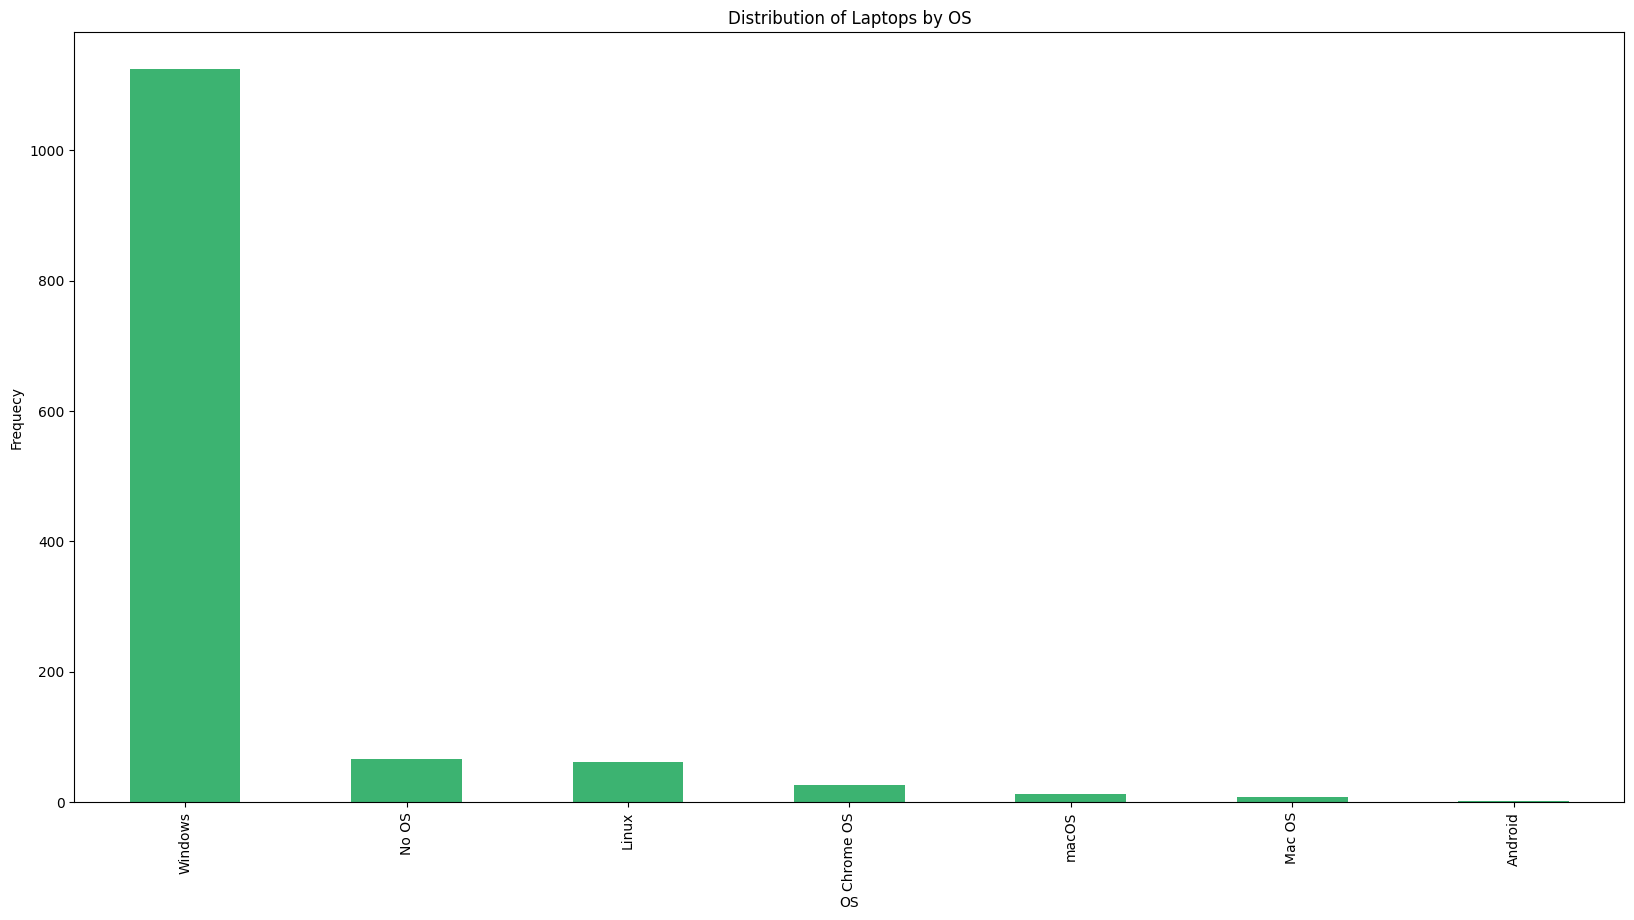

In [86]:
plt.figure(figsize=(20,10))
df['Operating System'].value_counts().plot(kind='bar',color='mediumseagreen')
plt.title('Distribution of Laptops by OS')
plt.xlabel('OS')
plt.ylabel('Frequecy')
plt.show()

In [87]:
def cat_os(inp):
    if inp == 'Windows':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [88]:
df['OS'] = df['Operating System'].apply(cat_os)

In [89]:
df['OS'].value_counts()

OS
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

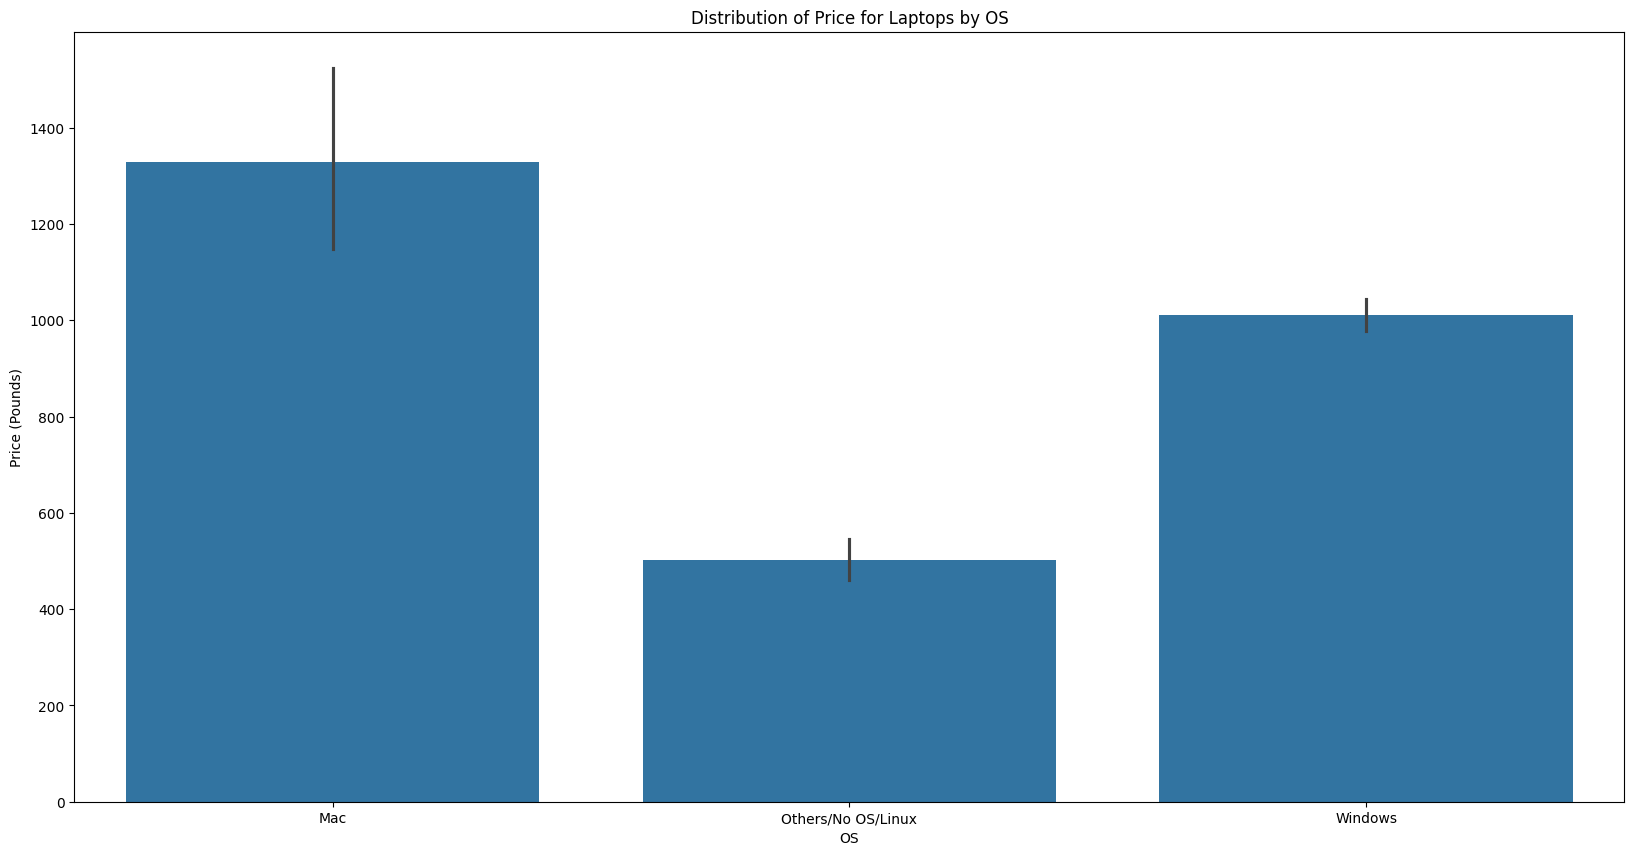

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x= df['OS'], y = df['Price (Pounds)'])
plt.title('Distribution of Price for Laptops by OS')
plt.xlabel('OS')
plt.ylabel('Price (Pounds)')
plt.show()

In [91]:
df.drop(columns=['Model Name','GPU','Operating System','Operating System Version'], inplace=True)

In [92]:
df.head()

,Manufacturer,Category,Screen,RAM,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,1.37,1138.7365,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,1440x900,8,1.34,764.0990,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Full HD 1920x1080,8,1.86,488.7500,0,0,141.211995,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,1.83,2156.8325,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,1.37,1533.0600,0,1,226.983001,Intel Core i5,0,256,Intel,Mac


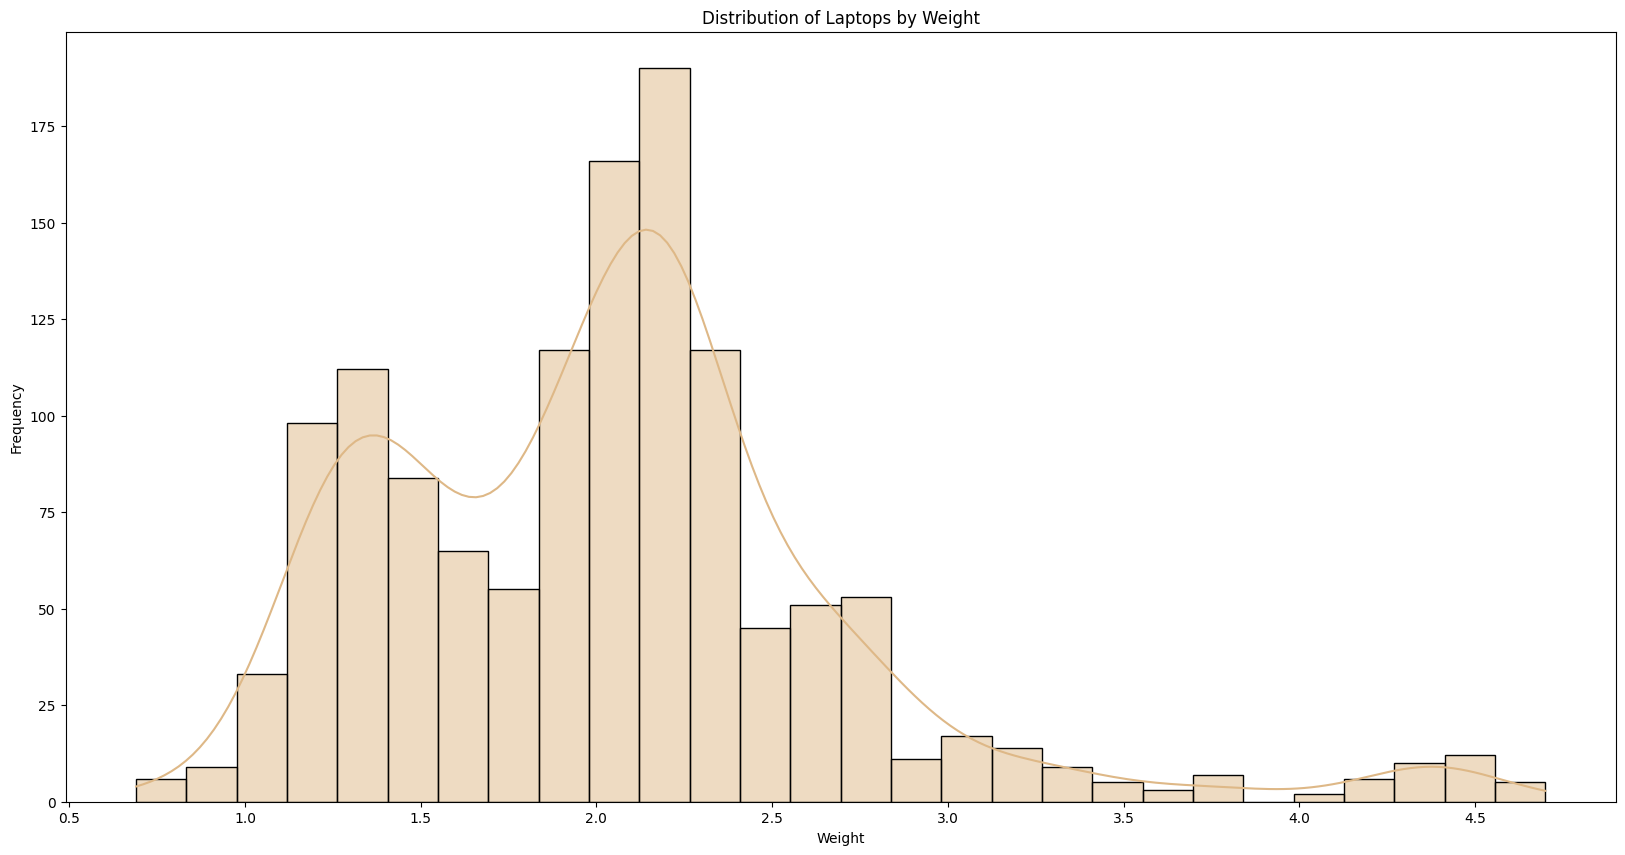

In [93]:
plt.figure(figsize=(20,10))
sns.histplot(df['Weight'],kde=True,color='burlywood')
plt.title('Distribution of Laptops by Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

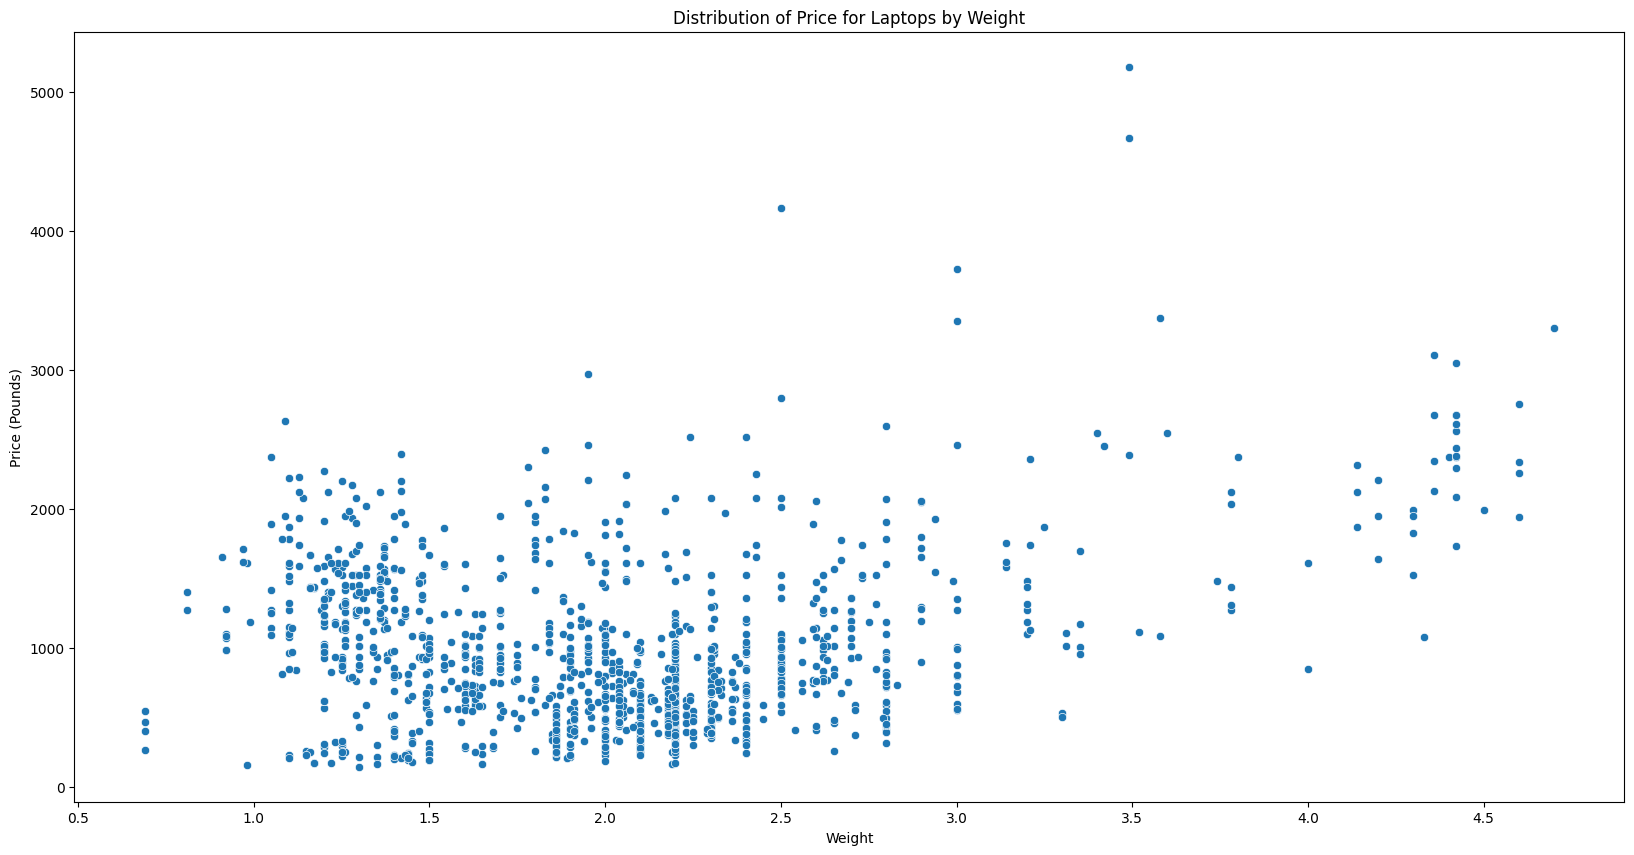

In [94]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Weight'],y=df['Price (Pounds)'])
plt.title('Distribution of Price for Laptops by Weight')
plt.xlabel('Weight')
plt.ylabel('Price (Pounds)')
plt.show()

In [95]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# If you want to see this correlation matrix
corr_matrix['Price (Pounds)']

RAM               0.742905
Weight            0.209867
Price (Pounds)    1.000000
Touchscreen       0.192917
IPS               0.253320
PPI               0.475368
HDD              -0.096891
SSD               0.669569
Name: Price (Pounds), dtype: float64

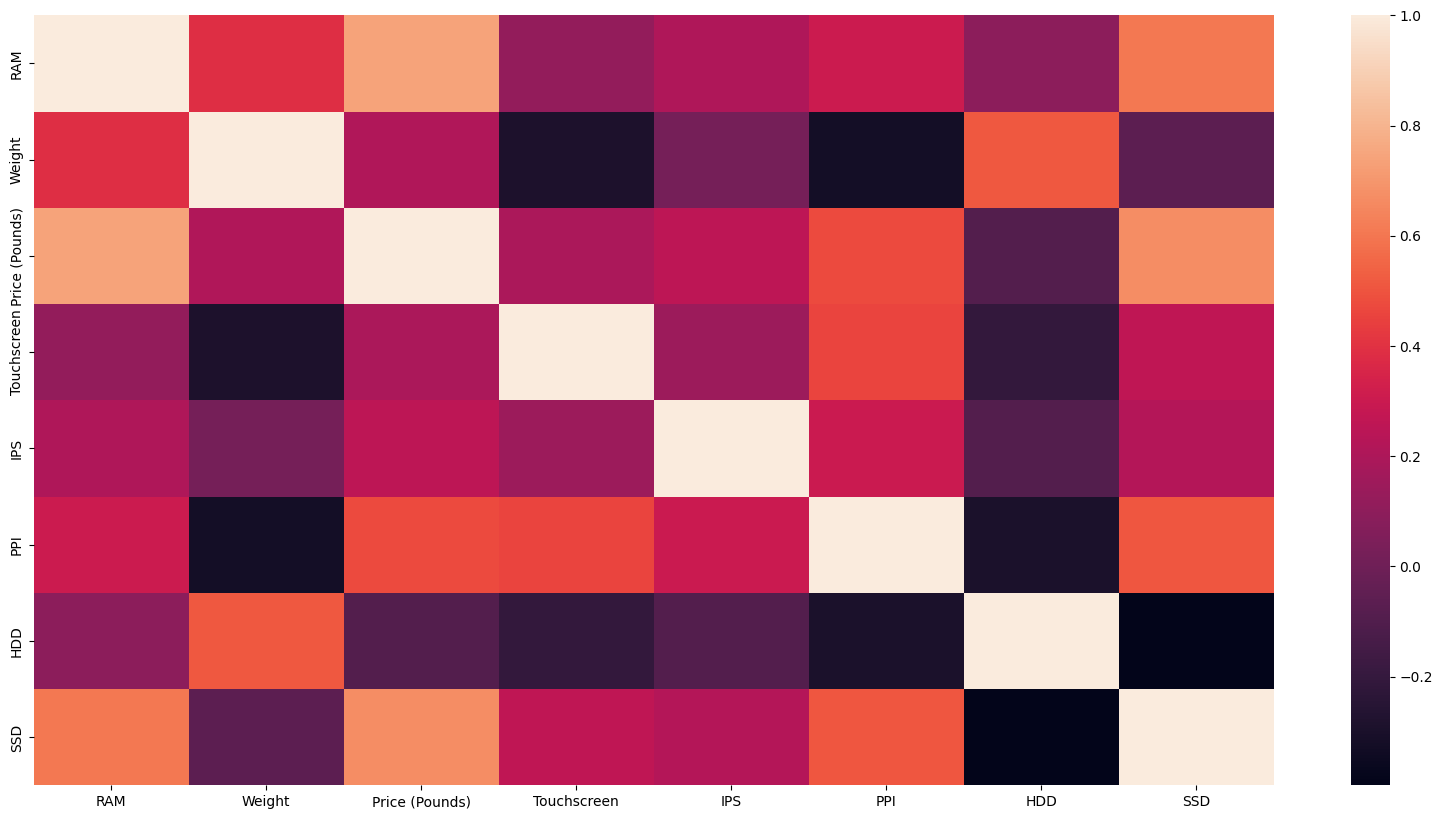

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix)
#plt.title('Distribution of Price for Laptops by Weight')
#plt.xlabel('Weight')
#plt.ylabel('Price (Pounds)')
plt.show()

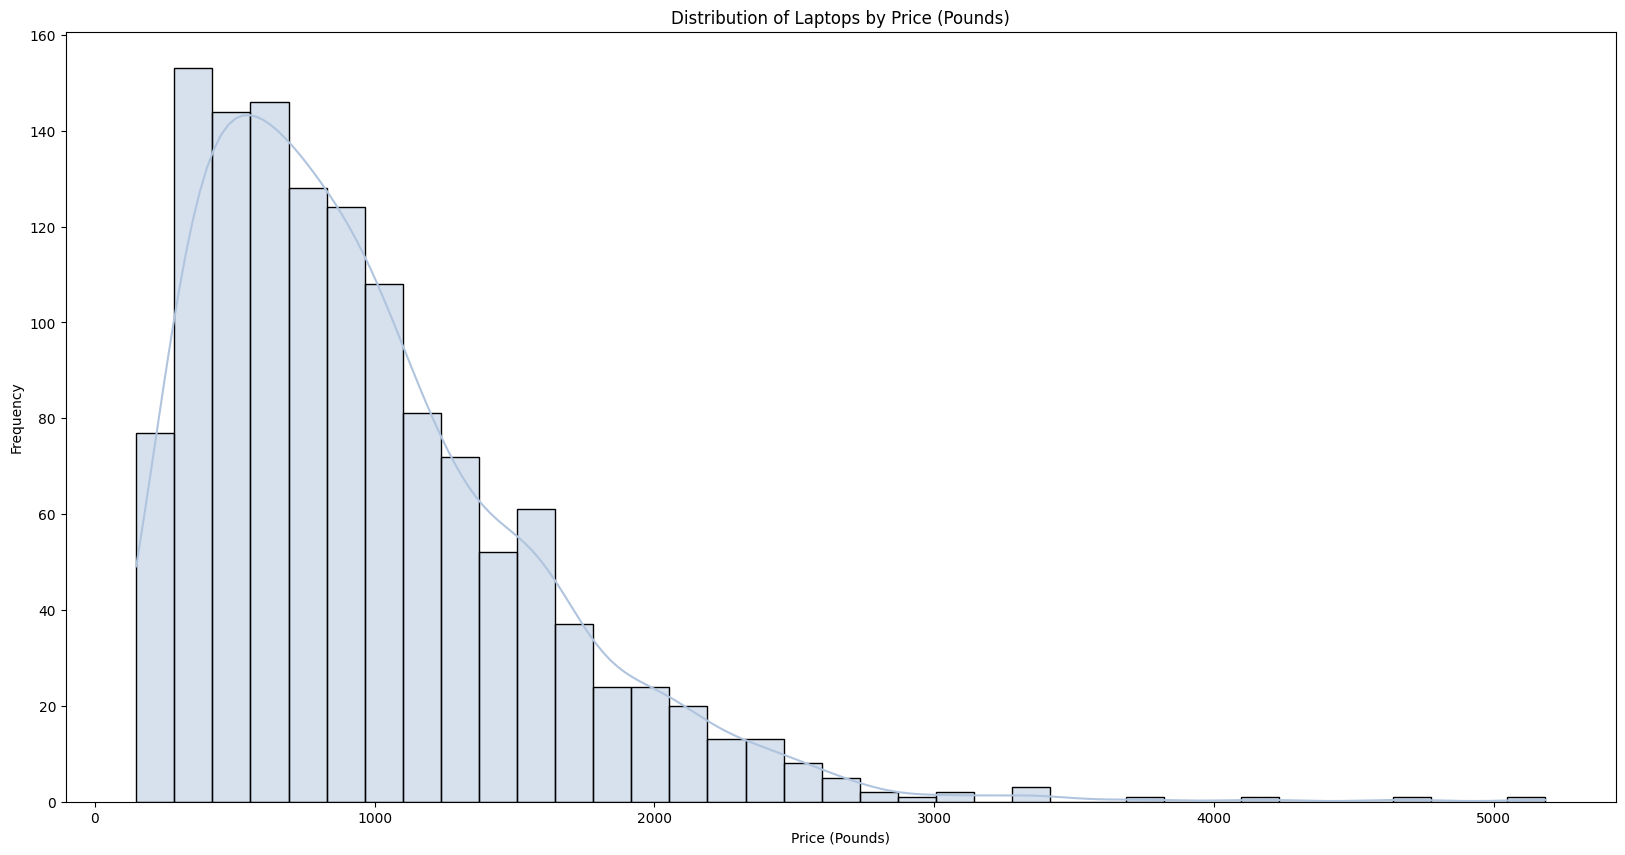

In [97]:
plt.figure(figsize=(20,10))
sns.histplot(df['Price (Pounds)'],kde=True,color='lightsteelblue')
plt.title('Distribution of Laptops by Price (Pounds)')
plt.xlabel('Price (Pounds)')
plt.ylabel('Frequency')
plt.show()

### Inference: The Distribution of the Price Column is Right Skewed due to very few laptop having a high Price. This may lead to issues for our ML Algorithm to converge. Hence, the Target Variable Price should be Normalised.

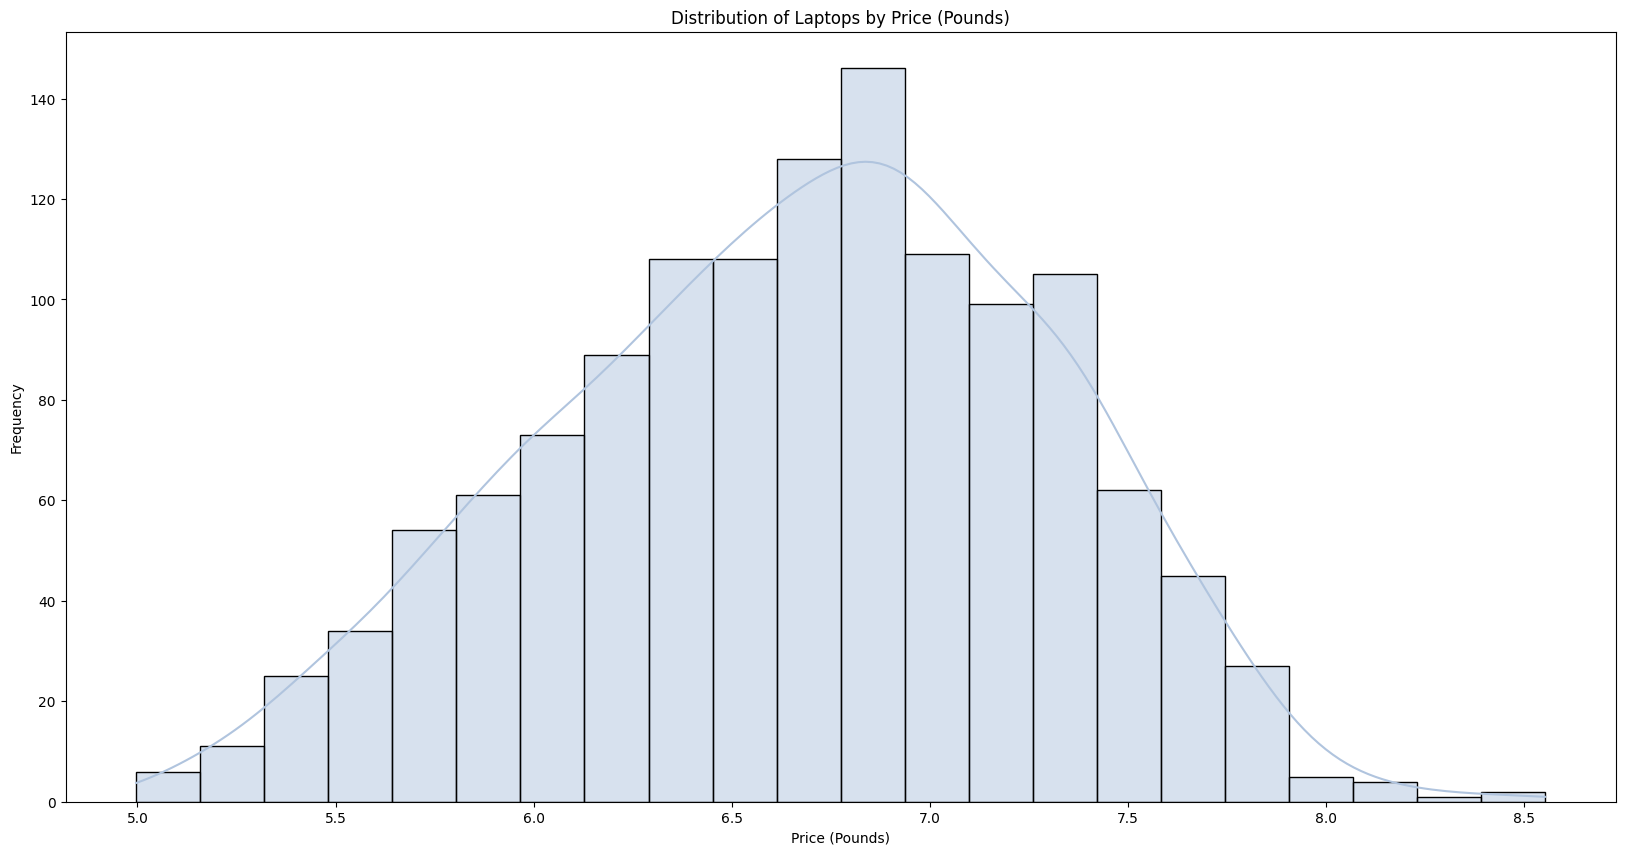

In [98]:
plt.figure(figsize=(20,10))
sns.histplot(np.log(df['Price (Pounds)']),kde=True,color='lightsteelblue')
plt.title('Distribution of Laptops by Price (Pounds)')
plt.xlabel('Price (Pounds)')
plt.ylabel('Frequency')
plt.show()

# Train Test Split

In [99]:
df.drop(columns=['Screen'],inplace=True)

In [100]:
X = df.drop(columns=['Price (Pounds)'])
y = np.log(df['Price (Pounds)'])

In [101]:
X.head()

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211995,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983001,Intel Core i5,0,256,Intel,Mac


In [102]:
y.head()

0    7.037675
1    6.638697
2    6.191851
3    7.676396
4    7.335021
Name: Price (Pounds), dtype: float64

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [104]:
X_train

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454667,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211995,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094207,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211995,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211995,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454667,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211995,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454667,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454667,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [105]:
!pip install scikit-learn

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [107]:
#!pip install xgboost

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [109]:
X_train.head(5)

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454667,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211995,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094207,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211995,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211995,Intel Core i5,1000,128,Nvidia,Windows


In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8055413925785783
MAE 0.21129447321781497


## Decision Tree Regressor

In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8461495865115038
MAE 0.18164584072786244


## SVM

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.808839491051148
MAE 0.20363084861260433


## Random Forest Regressor

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8823367319994535
MAE 0.16056263679198404


## Exporting the Model

In [114]:
import pickle as pkl

pkl.dump(df,open('df.pkl','wb'))
pkl.dump(pipe,open('pipe.pkl','wb'))

In [115]:
X_train

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454667,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211995,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094207,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211995,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211995,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454667,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211995,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454667,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454667,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [116]:
print(pipe)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])


In [117]:
df

,Manufacturer,Category,RAM,Weight,Price (Pounds),Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
0,Apple,Ultrabook,8,1.37,1138.7365,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,764.0990,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,488.7500,0,0,141.211995,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2156.8325,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1533.0600,0,1,226.983001,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,542.3000,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1274.1500,1,1,276.053526,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,194.6500,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,649.4000,0,0,100.454667,Intel Core i7,1000,0,AMD,Windows


In [118]:
X_test

,Manufacturer,Category,RAM,Weight,Touchscreen,IPS,PPI,CPUbrand,HDD,SSD,GPUbrand,OS
248,HP,Notebook,4,1.49,0,1,165.632116,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454667,Other Intel Processor,500,0,Intel,Others/No OS/Linux
1251,HP,Notebook,4,1.86,0,0,100.454667,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211995,Intel Core i5,1000,0,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632116,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335680,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454667,AMD Processor,500,0,AMD,Others/No OS/Linux
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632116,Intel Core i7,0,256,Intel,Windows


In [119]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.2.
